# STUDY I

In [1]:
%config InlineBackend.figure_format = 'retina' 

In [2]:
import numpy as np
import pandas as pd
from pandas.io import sql
import sqlalchemy as sa
import yaml as yml
import json
#import demjson
get_ipython().magic(u'matplotlib inline')
import scipy.stats as ssp
from matplotlib import pyplot as plt
from __future__ import division

In [3]:
pd.set_option('display.max_columns', None)

In [24]:
df = pd.read_csv("./STUDY_1_BFASOPG_RAW.csv")

In [21]:
df2 = pd.read_csv("../../../Study II/BFAS/GENERAL_FACTOR_EXTRACTION_and_CORRELATIONS/BFAS_SII_RAW_ANSWERS.csv")

In [25]:
df.head()

,Unnamed: 0,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,datastring
0,0,A06844383SJTPQU97CMSO:3F6KKYWMNB2T3GR7DLGSJEWF...,3F6KKYWMNB2T3GR7DLGSJEWF3HSDNF,A06844383SJTPQU97CMSO,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,firefox,windows,UNKNOWN,0,0,1.0,2014-10-23 19:14:20,2014-10-23 19:14:51,2014-10-23 19:21:12,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
1,1,A10IJLXWZZTN6L:3VW6495TLJ1QDQQCGJCHDF4NPP2YYY,3VW6495TLJ1QDQQCGJCHDF4NPP2YYY,A10IJLXWZZTN6L,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,chrome,windows,UNKNOWN,0,0,1.0,2014-10-23 19:09:11,2014-10-23 19:10:40,2014-10-23 19:28:20,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
2,2,A1102MP1CZI32V:3NQL1CS15R999WV7B8PX6G0T780VYM,3NQL1CS15R999WV7B8PX6G0T780VYM,A1102MP1CZI32V,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,firefox,windows,UNKNOWN,0,0,1.0,2014-10-23 19:25:16,2014-10-23 19:25:33,2014-10-23 19:35:12,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
3,3,A1153ZIEQX0ZJ8:3WQ3B2KGE8HXACMYU2RORHVCXVC1BP,3WQ3B2KGE8HXACMYU2RORHVCXVC1BP,A1153ZIEQX0ZJ8,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,chrome,windows,UNKNOWN,0,0,1.0,2014-10-23 19:06:16,2014-10-23 19:06:23,2014-10-23 19:12:06,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
4,4,A11ZAAI7X8HSM0:3WYGZ5XF3WGYXZPMDYJ1ML1BAPWSKI,3WYGZ5XF3WGYXZPMDYJ1ML1BAPWSKI,A11ZAAI7X8HSM0,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,chrome,windows,UNKNOWN,0,0,1.0,2014-10-23 19:05:36,2014-10-23 19:08:05,2014-10-23 19:27:27,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."


In [29]:
len(set(df['workerid']).intersection(set(df2['workerid'])))

45

In [30]:
#randomly select 1/2? No, put them all in study I to balance out the sample sizes.

In [37]:
print(len(df))
print(len(df2)-45)

376
374


In [38]:
df2[~df2['workerid'].isin(df['workerid'])].to_csv("BFAS_STUDY_II_DEDUPED.csv")

In [5]:
#df = df.convert_objects(convert_numeric=True)

In [6]:
df = df.drop("Unnamed: 0",axis=1)

In [7]:
df.head()

,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,datastring
0,A06844383SJTPQU97CMSO:3F6KKYWMNB2T3GR7DLGSJEWF...,3F6KKYWMNB2T3GR7DLGSJEWF3HSDNF,A06844383SJTPQU97CMSO,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,firefox,windows,UNKNOWN,0,0,1.0,2014-10-23 19:14:20,2014-10-23 19:14:51,2014-10-23 19:21:12,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
1,A10IJLXWZZTN6L:3VW6495TLJ1QDQQCGJCHDF4NPP2YYY,3VW6495TLJ1QDQQCGJCHDF4NPP2YYY,A10IJLXWZZTN6L,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,chrome,windows,UNKNOWN,0,0,1.0,2014-10-23 19:09:11,2014-10-23 19:10:40,2014-10-23 19:28:20,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
2,A1102MP1CZI32V:3NQL1CS15R999WV7B8PX6G0T780VYM,3NQL1CS15R999WV7B8PX6G0T780VYM,A1102MP1CZI32V,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,firefox,windows,UNKNOWN,0,0,1.0,2014-10-23 19:25:16,2014-10-23 19:25:33,2014-10-23 19:35:12,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
3,A1153ZIEQX0ZJ8:3WQ3B2KGE8HXACMYU2RORHVCXVC1BP,3WQ3B2KGE8HXACMYU2RORHVCXVC1BP,A1153ZIEQX0ZJ8,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,chrome,windows,UNKNOWN,0,0,1.0,2014-10-23 19:06:16,2014-10-23 19:06:23,2014-10-23 19:12:06,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."
4,A11ZAAI7X8HSM0:3WYGZ5XF3WGYXZPMDYJ1ML1BAPWSKI,3WYGZ5XF3WGYXZPMDYJ1ML1BAPWSKI,A11ZAAI7X8HSM0,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,chrome,windows,UNKNOWN,0,0,1.0,2014-10-23 19:05:36,2014-10-23 19:08:05,2014-10-23 19:27:27,0.0,4,"{""condition"":0,""counterbalance"":0,""assignmentI..."


In [8]:
len(df)

376

In [9]:
#df.to_csv("STUDY_1_BFASOPG_RAW.csv")

In [10]:
def takestring(row):
    #print json.loads(row['datastring'])
    try:
        d = json.loads(row['datastring'])
    except:
        print(row)
    else:
   # print jj
        j= d['data']
        for a in j:
            b = a['trialdata']
            if 'answer' in b:
                item_id = b['id']
                rawanswer = b['answer']
                row[item_id] = rawanswer
    #print row
        return pd.Series(row)


In [11]:
df=df[df['status']==4]


In [12]:
len(df)

334

In [13]:
df = df.apply(takestring,axis=1)
#df = df.convert_objects(convert_numeric=True)

uniqueid          A1MQ9M8OX7BI0X:3SBEHTYCWN44NQB7C1QERRAZZ64IYC
assignmentid                     3SBEHTYCWN44NQB7C1QERRAZZ64IYC
workerid                                         A1MQ9M8OX7BI0X
hitid                            3AA88CN98P4T7131M26OFNUTG1DYKP
ipaddress                                        127.13.130.129
browser                                                  chrome
platform                                                windows
language                                                UNKNOWN
cond                                                          0
counterbalance                                                0
codeversion                                                   1
beginhit                                    2014-10-23 19:11:06
beginexp                                    2014-10-23 19:12:20
endhit                                      2014-10-23 19:40:01
bonus                                                         0
status                                  

In [14]:
len(df)

334

In [15]:
df = df[df['BFAS-1+'].notnull()]


In [16]:
len(df)

333

In [17]:
print (df.columns.tolist()[:-17][-26:])
print (len(df.columns.tolist()[:-17][-26:]))

['IE_19+', 'IE_20+', 'IE_21+', 'IE_22-', 'IE_23-', 'IE_24+', 'IE_25-', 'IE_26-', 'OPG_10+', 'OPG_11-', 'OPG_12+', 'OPG_13+', 'OPG_14+', 'OPG_15+', 'OPG_16+', 'OPG_17-', 'OPG_18-', 'OPG_9+', 'PBR_1+', 'PBR_2-', 'PBR_3+', 'PBR_4+', 'PBR_5+', 'PBR_6-', 'PBR_7-', 'PBR_8-']
26


In [19]:
df.to_csv("2021_BFAS_PROCESSED_STUDYI.csv")

In [18]:
ls_col = df.columns.values.tolist()
ls_col.sort()

In [19]:
#ls_col[:-17][:-26]

In [20]:
zls_col = df.columns.values.tolist()
zls_col.sort()
# print ls_col
zr_ls_col = zls_col[:-17] #the restricted list of columns #MAKE SURE THIS PARAM IS RIGHT
zbfas_cols = ['workerid']
zopg_cols = ['workerid']
zbfas_cols.extend(zr_ls_col[:-26])
zopg_cols.extend(zr_ls_col[-26:])

In [21]:
zOpgDf = df[zopg_cols]

In [22]:
df[zr_ls_col] = df[zr_ls_col].astype(float)

In [23]:
lscol = df.columns.values.tolist()

In [24]:
df.head()

,BFAS-1+,BFAS-10-,BFAS-100-,BFAS-101-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-2+,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-3+,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-4+,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-5+,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-6+,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-8-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-88-,BFAS-89-,BFAS-9-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-F7-,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,IE_19+,IE_20+,IE_21+,IE_22-,IE_23-,IE_24+,IE_25-,IE_26-,OPG_10+,OPG_11-,OPG_12+,OPG_13+,OPG_14+,OPG_15+,OPG_16+,OPG_17-,OPG_18-,OPG_9+,PBR_1+,PBR_2-,PBR_3+,PBR_4+,PBR_5+,PBR_6-,PBR_7-,PBR_8-,assignmentid,beginexp,beginhit,bonus,browser,codeversion,cond,counterbalance,datastring,endhit,hitid,ipaddress,language,platform,status,uniqueid,workerid
0,91.15,10.41,13.98,90.03,67.54,36.36,91.37,9.19,64.25,88.92,23.55,11.08,10.75,54.96,88.59,90.37,90.59,74.22,60.41,30.35,30.35,31.46,29.57,29.23,10.75,30.57,58.85,70.32,60.41,66.65,10.19,30.46,30.01,60.19,89.14,29.45,79.57,89.70,89.81,89.14,60.63,60.30,26.00,69.32,20.10,10.75,90.53,62.31,34.91,61.08,74.11,50.00,60.13,88.70,60.41,27.00,89.37,69.32,59.74,26.67,66.04,28.23,74.11,35.36,9.86,60.19,59.97,30.35,30.57,89.09,70.55,30.12,40.37,65.42,89.14,9.08,29.57,24.67,90.03,35.36,90.70,89.37,11.75,10.30,89.70,89.25,9.63,60.30,89.14,75.11,28.34,89.59,64.76,8.96,9.08,90.37,90.14,65.87,90.26,8.96,90.26,89.92,50.56,89.59,9.74,89.70,9.35,0.00,90.48,89.25,89.92,90.48,89.81,89.81,8.74,10.30,89.70,90.92,90.03,9.97,90.14,89.81,65.09,9.86,9.97,19.10,3F6KKYWMNB2T3GR7DLGSJEWF3HSDNF,2014-10-23 19:14:51,2014-10-23 19:14:20,0.0,firefox,1.0,0.0,0.0,"{""condition"":0,""counterbalance"":0,""assignmentI...",2014-10-23 19:21:12,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,UNKNOWN,windows,4.0,A06844383SJTPQU97CMSO:3F6KKYWMNB2T3GR7DLGSJEWF...,A06844383SJTPQU97CMSO
1,65.03,39.76,34.86,100.00,88.98,9.47,90.31,68.93,25.17,75.17,8.24,74.28,14.59,63.47,0.00,35.41,50.33,40.65,59.69,60.13,40.53,20.60,20.49,50.22,60.69,10.69,89.98,100.00,79.40,90.20,0.45,0.00,0.00,0.00,0.00,90.20,60.36,63.70,100.00,95.43,93.76,19.49,9.91,9.58,10.36,25.28,40.20,9.91,100.00,65.70,90.09,90.20,100.00,100.00,0.00,0.22,10.13,50.45,0.00,2.67,11.02,8.57,24.83,24.61,93.54,100.00,100.00,89.76,100.00,63.03,69.82,10.02,61.25,50.67,50.11,49.33,89.87,10.08,67.59,100.00,89.76,90.09,50.67,25.72,49.55,90.65,10.24,30.40,100.00,29.40,50.00,9.80,100.00,14.81,0.00,100.00,10.13,100.00,89.64,40.65,99.89,90.31,49.89,10.36,89.98,9.02,30.18,0.00,90.20,24.72,89.87,33.96,35.52,90.87,59.91,10.02,100.00,19.82,89.98,10.13,90.42,100.00,89.76,30.62,23.83,19.93,3VW6495TLJ1QDQQCGJCHDF4NPP2YYY,2014-10-23 19:10:40,2014-10-23 19:09:11,0.0,chrome,1.0,0.0,0.0,"{""condition"":0,""counterbalance"":0,""assignmentI...",2014-10-23 19:28:20,3AA88CN98P4T7131M26OFNUTG1DYKP,127.13.130.129,UNKNOWN,windows,4.0,A10IJLXWZZTN6L:3VW6495TLJ1QDQQCGJCHDF4NPP2YYY,A10IJLXWZZTN6L
2,41.20,40.65,32.18,39.76,75.06,38.75,66.93,65.59,38.98,57.41,35.75,40.09,37.64,59.13,29.84,64.42,59.13,64.25,42.98,60.47,45.55,50.00,54.57,40.42,67.37,17.48,66.93,75.61,65.70,66.48,16.59,65.59,22.38,29.51,32.74,68.60,64.14,68.37,63.25,37.97,39.98,68.04,74.39,46.88,35.97,59.58,71.60,80.96,81.85,68.04,69.27,75.06,65.53,64.42,33.63,25.84,34.74,62.19,21.49,40.65,55.90,67.26,73.72,68.37,28.17,40.65,63.36,37.64,40.09,43.99,55.23,39.53,42.43,65.48,50.45,61.19,42.87,77.84,62.58,65.48,67.37,60.58,74.50,40.98,30.96,73.83,66.37,58.57,55.12,88.75,60.24,71.49,67.59,28.17,41.20,39.98,60.36,49.78,53.67,32.52,38.31,68.26,50.00,73.50,80.73,29.84,35.30,30.85

In [25]:
def split_and_reverse(df):
    ls_col = df.columns.values.tolist()
    ls_col.sort()
   # print ls_col
    r_ls_col = ls_col[:-17] #the restricted list of columns
    bfas_cols = ['workerid']
    opg_cols = ['workerid']
    bfas_cols.extend(r_ls_col[:-26])
    opg_cols.extend(r_ls_col[-26:])
    Neuroticism = ['BFAS-1+','BFAS-2+','BFAS-3+',
                   'BFAS-4+','BFAS-5+','BFAS-6+',
                   'BFAS-F7-','BFAS-8-','BFAS-9-',
                   'BFAS-10-','BFAS-11+','BFAS-12+',
                   'BFAS-13+','BFAS-14+','BFAS-15+',
                   'BFAS-16+','BFAS-17-','BFAS-18-',
                   'BFAS-19-','BFAS-20-']
    print (bfas_cols[0:10])
    print ('\n')
    print (opg_cols)
    print ('\n')
    BfasDf = df[bfas_cols]
    OpgDf = df[opg_cols]

   # df['ref'] = pd.Series([100.0 for x in range(len(BffDf['workerId']))])
   # print df['ref'].tail()



    for label in bfas_cols:
        #print label
        if label[-1]=='-': #if item is reversed:
             #print BffDf[label].head()
             #print '\n'
             #print len(BffDf[label])
             #a = ref.sub(BffDf[label])
             #print a.head()
            BfasDf[label] = 100- BfasDf[label].astype(float)



        elif label[-1]=='+': #label = workerID
            pass
        else:
            BfasDf.loc[label] = df['workerid']

    print (OpgDf['OPG_16+'].loc[1])
    print (type(OpgDf['OPG_16+'].loc[1]))

    OpgDf['OPG_16+'] = 100-2*abs(OpgDf['OPG_16+']-50)
    OpgDf['IE_21+'] = 100-2*abs(OpgDf['IE_21+']-50)


    OpgDf['PBR_1+'] = ((OpgDf['PBR_1+']-50)*1.1)+50
    OpgDf['PBR_3+'] = ((OpgDf['PBR_3+']-50)*1.1)+50
    OpgDf['OPG_15+'] = ((OpgDf['OPG_15+']-50)*1.1)+50

    OpgDf['PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 100 if x>100 else x)
    OpgDf['PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 100 if x>100 else x)
    OpgDf['OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 100 if x>100 else x)
    
    OpgDf['PBR_1+'] = OpgDf['PBR_1+'].apply(lambda x: 0 if x<0 else x)
    OpgDf['PBR_3+'] = OpgDf['PBR_3+'].apply(lambda x: 0 if x<0 else x)
    OpgDf['OPG_15+'] = OpgDf['OPG_15+'].apply(lambda x: 0 if x<0 else x)

    for label in OpgDf:
        if label[-1]=='-':
            OpgDf[label]=100-OpgDf[label].astype(float)
        elif label[-1]=='+':
            pass
        else:
            OpgDf[label] = df['workerid']

    ##Now, change neuroticism to stability
    for label in Neuroticism:
        BfasDf[label] = 100-BfasDf[label].astype(float)

    #BffDf.sort(axis=1,inplace=True,ascending=True)
    #OpgDf.sort(axis=1,inplace=True,ascending=True)

    return BfasDf,OpgDf


In [26]:
bfas,opg = split_and_reverse(df)

['workerid', 'BFAS-1+', 'BFAS-10-', 'BFAS-100-', 'BFAS-101-', 'BFAS-11+', 'BFAS-12+', 'BFAS-13+', 'BFAS-14+', 'BFAS-15+']


['workerid', 'IE_19+', 'IE_20+', 'IE_21+', 'IE_22-', 'IE_23-', 'IE_24+', 'IE_25-', 'IE_26-', 'OPG_10+', 'OPG_11-', 'OPG_12+', 'OPG_13+', 'OPG_14+', 'OPG_15+', 'OPG_16+', 'OPG_17-', 'OPG_18-', 'OPG_9+', 'PBR_1+', 'PBR_2-', 'PBR_3+', 'PBR_4+', 'PBR_5+', 'PBR_6-', 'PBR_7-', 'PBR_8-']


59.91
<class 'numpy.float64'>


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-25-c50a8aebc249>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BfasDf[label] = 100- BfasDf[label].astype(float)
<ipython-input-25-c50a8aebc249>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [27]:
print (len(bfas))
print( len(opg))

334
333


In [28]:
bfas

,workerid,BFAS-1+,BFAS-10-,BFAS-100-,BFAS-101-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-2+,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-3+,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-4+,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-5+,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-6+,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-8-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-88-,BFAS-89-,BFAS-9-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-F7-,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-
0,A06844383SJTPQU97CMSO,8.85,10.41,86.02,9.97,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,45.04,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,89.25,69.43,58.85,70.32,60.41,66.65,89.81,69.54,69.99,39.81,10.86,70.55,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,9.47,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,30.68,40.26,26.67,66.04,28.23,74.11,35.36,90.14,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,90.03,64.64,90.70,89.37,88.25,89.70,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,9.08,90.37,90.14,65.87,90.26,91.04
1,A10IJLXWZZTN6L,34.97,39.76,65.14,0.00,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,36.53,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,39.31,89.31,89.98,100.00,79.40,90.20,99.55,100.00,100.00,100.00,100.00,9.80,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,59.80,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,49.55,100.00,2.67,11.02,8.57,24.83,24.61,6.46,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,67.59,0.00,89.76,90.09,49.33,74.28,49.55,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,0.00,100.00,10.13,100.00,89.64,59.35
2,A1102MP1CZI32V,58.80,40.65,67.82,60.24,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,40.87,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,32.63,82.52,66.93,75.61,65.70,66.48,83.41,34.41,77.62,70.49,67.26,31.40,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,28.40,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,37.81,78.51,40.65,55.90,67.26,73.72,68.37,71.83,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,62.58,34.52,67.37,60.58,25.50,59.02,30.96,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,41.20,39.98,60.36,49.78,53.67,67.48
3,A1153ZIEQX0ZJ8,50.00,50.00,87.03,62.42,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,50.00,81.57,67.09,71.05,77.34,77.34,50.00,93.26,50.00,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,36.36,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,50.00,74.11,63.08,50.00,70.55,72.10,65.53,67.43,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,50.00,76.22,50.00,30.46,79.57,63.31,50.00,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,37.25,50.00,75.56,50.00,50.11,59.86
4,A11ZAAI7X8HSM0,50.00,50.00,66.43,22.22,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,51.73,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,47.94,89.48,89.70,50.00,92.26,50.00,42.48,8.63,31.01,73.55,9.30,19.65,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,50.00,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,90.70,50.00,91.70,79.57,90.59,90.92,49.16,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,10.08,90.14,90.59,89.81,50.00,89.70
...,...,

In [29]:
bfas = bfas.drop('workerid')

In [30]:
bfas

,workerid,BFAS-1+,BFAS-10-,BFAS-100-,BFAS-101-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-2+,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-3+,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-4+,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-5+,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-6+,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-8-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-88-,BFAS-89-,BFAS-9-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-F7-,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-
0,A06844383SJTPQU97CMSO,8.85,10.41,86.02,9.97,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,45.04,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,89.25,69.43,58.85,70.32,60.41,66.65,89.81,69.54,69.99,39.81,10.86,70.55,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,9.47,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,30.68,40.26,26.67,66.04,28.23,74.11,35.36,90.14,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,90.03,64.64,90.70,89.37,88.25,89.70,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,9.08,90.37,90.14,65.87,90.26,91.04
1,A10IJLXWZZTN6L,34.97,39.76,65.14,0.00,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,36.53,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,39.31,89.31,89.98,100.00,79.40,90.20,99.55,100.00,100.00,100.00,100.00,9.80,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,59.80,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,49.55,100.00,2.67,11.02,8.57,24.83,24.61,6.46,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,67.59,0.00,89.76,90.09,49.33,74.28,49.55,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,0.00,100.00,10.13,100.00,89.64,59.35
2,A1102MP1CZI32V,58.80,40.65,67.82,60.24,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,40.87,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,32.63,82.52,66.93,75.61,65.70,66.48,83.41,34.41,77.62,70.49,67.26,31.40,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,28.40,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,37.81,78.51,40.65,55.90,67.26,73.72,68.37,71.83,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,62.58,34.52,67.37,60.58,25.50,59.02,30.96,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,41.20,39.98,60.36,49.78,53.67,67.48
3,A1153ZIEQX0ZJ8,50.00,50.00,87.03,62.42,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,50.00,81.57,67.09,71.05,77.34,77.34,50.00,93.26,50.00,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,36.36,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,50.00,74.11,63.08,50.00,70.55,72.10,65.53,67.43,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,50.00,76.22,50.00,30.46,79.57,63.31,50.00,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,37.25,50.00,75.56,50.00,50.11,59.86
4,A11ZAAI7X8HSM0,50.00,50.00,66.43,22.22,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,51.73,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,47.94,89.48,89.70,50.00,92.26,50.00,42.48,8.63,31.01,73.55,9.30,19.65,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,50.00,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,90.70,50.00,91.70,79.57,90.59,90.92,49.16,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,10.08,90.14,90.59,89.81,50.00,89.70
...,...,

In [31]:
#working towards: OPG -- Personality item correlation

In [32]:
correct_order_opg = [#'workerid',
 'PBR_1+',
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'PBR_8-',
 'OPG_9+',
 'OPG_10+',
 'OPG_11-',
 'OPG_12+',
 'OPG_13+',
 'OPG_14+',
 'OPG_15+',
 'OPG_16+',
 'OPG_17-',
 'OPG_18-',
 'IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_23-',
 'IE_24+',
 'IE_25-',
 'IE_26-',
]

In [33]:
subset = ['PBR_1+', #From Factor analysis - G loadings from a five factor solution of less than 20 are dropped
 'PBR_2-',
 'PBR_3+',
 'PBR_4+',
 'PBR_5+',
 'PBR_6-',
 'PBR_7-',
 'OPG_10+',
 'OPG_12+',
 'OPG_13+',
 'OPG_14+',
 'OPG_15+',
 'OPG_16+',
 'IE_19+',
 'IE_20+',
 'IE_21+',
 'IE_22-',
 'IE_24+',
 'IE_25-'
]

In [34]:
len(subset)

19

In [35]:
ssopg = opg[subset]

In [36]:
ssopg.dtypes

PBR_1+     float64
PBR_2-     float64
PBR_3+     float64
PBR_4+     float64
PBR_5+     float64
PBR_6-     float64
PBR_7-     float64
OPG_10+    float64
OPG_12+    float64
OPG_13+    float64
OPG_14+    float64
OPG_15+    float64
OPG_16+    float64
IE_19+     float64
IE_20+     float64
IE_21+     float64
IE_22-     float64
IE_24+     float64
IE_25-     float64
dtype: object

In [37]:
ssopg.head()

,PBR_1+,PBR_2-,PBR_3+,PBR_4+,PBR_5+,PBR_6-,PBR_7-,OPG_10+,OPG_12+,OPG_13+,OPG_14+,OPG_15+,OPG_16+,IE_19+,IE_20+,IE_21+,IE_22-,IE_24+,IE_25-
0,94.033,90.03,94.154,89.81,65.09,90.14,90.03,90.48,89.92,90.48,89.81,93.791,17.48,90.26,89.92,98.88,10.41,89.70,90.65
1,93.978,89.87,94.462,100.00,89.76,69.38,76.17,90.20,89.87,33.96,35.52,94.957,80.18,99.89,90.31,99.78,89.64,9.02,69.82
2,71.802,67.59,70.031,64.25,62.81,66.26,62.58,62.69,55.35,32.85,42.43,35.425,100.00,38.31,68.26,100.00,26.50,29.84,64.70
3,100.000,50.00,99.797,95.04,99.83,79.68,32.52,70.10,49.89,38.70,61.30,55.324,100.00,49.94,95.38,100.00,50.00,38.70,50.00
4,93.538,92.37,93.538,91.37,90.14,20.15,90.21,88.15,90.32,12.08,74.09,93.670,19.96,37.69,70.77,17.92,8.35,75.89,89.29


In [38]:
ssopg['opg']=ssopg.mean(axis=1,numeric_only=True)
bfas['gfp'] = bfas.mean(axis=1,numeric_only=True)

<ipython-input-38-c88fd38d762a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ssopg['opg']=ssopg.mean(axis=1,numeric_only=True)


In [39]:
bfas['gfp']

0      60.4929
1      57.8933
2      53.8851
3      55.7894
4      64.1790
        ...   
368    57.6644
369    44.5121
370    58.6951
371    79.2457
372    70.6823
Name: gfp, Length: 333, dtype: float64

In [40]:
ssopg['opg']

0      81.845684
1      78.777211
2      59.035684
3      69.273737
4      65.762947
         ...    
368    68.357105
369    45.016895
370    60.800158
371    86.225789
372    83.149421
Name: opg, Length: 333, dtype: float64

In [41]:
ssp.pearsonr(ssopg['opg'].values,bfas['gfp'].values )

(0.7215707468207364, 8.474284905560648e-55)

In [42]:
## Trying Random Subsets

In [46]:
tst = pd.DataFrame(bfas['gfp'])

In [47]:
tst['opg'] = ssopg['opg']

In [59]:
tst.sample(50).corr()

,gfp,opg
gfp,1.00000,0.73674
opg,0.73674,1.00000


In [74]:
smpl  = tst.sample(50)
ssp.pearsonr(smpl['opg'].values,smpl['gfp'].values )

(0.774045696136532, 4.328176674638282e-11)

In [75]:
bfas.to_csv("2021_BFAS_Study1.csv",index=False)

In [79]:
ssopg['opg'].to_csv("2021_OPG_BFAS_S1.csv",index=False)

In [42]:
## BY AGE AND GENDER

In [44]:
def ExtractGender(row):
    #print json.loads(row['datastring'])
    try:
        d = json.loads(row['datastring'])
    except:
        print( row)
    else:
        return d['questiondata']['engagement']

def ExtractAge(row):
    #print json.loads(row['datastring'])
    try:
        d = json.loads(row['datastring'])
    except:
        print( row)
    else:
        return d['questiondata']['age']

In [45]:
Gender = df.apply(ExtractGender,axis=1)
Age = df.apply(ExtractAge,axis=1)

In [46]:
Gender.value_counts()

Male      194
Female    139
dtype: int64

In [50]:
Gender = pd.DataFrame(Gender,columns=['gender'])
Gender['gfp'] = bfas['gfp']
Gender['opg'] = ssopg['opg']

In [52]:
Gender.groupby('gender').apply(lambda x: ssp.stats.pearsonr(x['gfp'],x['opg']))

gender
Female    (0.7701106191308872, 1.571046633438675e-28)
Male      (0.6759015962873618, 3.020348620048007e-27)
dtype: object

In [53]:
Age = pd.DataFrame(Age.astype(float),columns=['age'])

In [54]:
Age['gfp'] = bfas['gfp']
Age['opg'] = ssopg['opg']

In [56]:
ssp.stats.pearsonr(Age['gfp'],Age['age'])

(0.30986422922778933, 7.649367155205148e-09)

In [57]:
ssp.stats.pearsonr(Age['opg'],Age['age'])

(0.28073297531948826, 1.9011719546035687e-07)

In [58]:
cohort1 = Age[(Age['age']>=18) & (Age['age']<=25)]
cohort2 = Age[(Age['age']>=26) & (Age['age']<=33)]
cohort3 = Age[(Age['age']>=34) & (Age['age']<=41)]
cohort4 = Age[(Age['age']>=42)]

In [59]:
for cc in [cohort1,cohort2,cohort3,cohort4]:
    print(len(cc))
    print(cc['age'].min())
    print(cc['age'].max())
    print(ssp.stats.pearsonr(cc['gfp'],cc['opg']))
    print("\n")

86
18.0
25.0
(0.691846282061835, 1.631350029833531e-13)


116
26.0
33.0
(0.6993522724791489, 2.5088092502765233e-18)


63
34.0
41.0
(0.7378846951733196, 5.2308257540620936e-12)


68
42.0
68.0
(0.6710981041770999, 3.788873287495492e-10)




In [38]:
3) I don't know the literature on the GFP at all.  But maybe the core hypothesis - that your items are a good measure of the GFP - might be tested simply and eloquently by comparing the correlation between (a) the sum of the OPG items and GFP with (b) other random samples of items from the BFAS and GFP (see p. 26).


SyntaxError: unmatched ')' (<ipython-input-38-364bd825f45e>, line 1)

In [ ]:
## MONTE CARLO
df.sample(2, axis=1)

In [39]:
BFAS = bfas.iloc[:,1:]

In [40]:
BFAS.mean(axis=1)

0      60.4929
1      57.8933
2      53.8851
3      55.7894
4      64.1790
        ...   
368    57.6644
369    44.5121
370    58.6951
371    79.2457
372    70.6823
Length: 333, dtype: float64

In [41]:
len(bfas)

333

In [43]:
gfp = BFAS.mean(axis=1)

In [57]:
opg.mean(axis=1)

0      77.996077
1      71.997577
2      56.877231
3      69.521962
4      65.232538
         ...    
368    61.374038
369    40.981577
370    56.624731
371    79.933077
372    82.580346
Length: 333, dtype: float64

In [58]:
ssp.pearsonr(opg.mean(axis=1),gfp)

(0.6711323582265323, 6.146212390578196e-45)

In [114]:
corrs = [ssp.pearsonr(BFAS.sample(10,axis=1).mean(axis=1),gfp)[0] for i in range(10000)]

(array([1.000e+00, 0.000e+00, 1.000e+00, 7.000e+00, 3.000e+00, 6.000e+00,
        2.400e+01, 2.600e+01, 3.800e+01, 5.900e+01, 1.170e+02, 2.450e+02,
        3.270e+02, 6.040e+02, 1.070e+03, 1.738e+03, 2.206e+03, 2.218e+03,
        1.133e+03, 1.770e+02]),
 array([0.54758678, 0.56724654, 0.5869063 , 0.60656606, 0.62622583,
        0.64588559, 0.66554535, 0.68520512, 0.70486488, 0.72452464,
        0.7441844 , 0.76384417, 0.78350393, 0.80316369, 0.82282346,
        0.84248322, 0.86214298, 0.88180274, 0.90146251, 0.92112227,
        0.94078203]),
 <BarContainer object of 20 artists>)

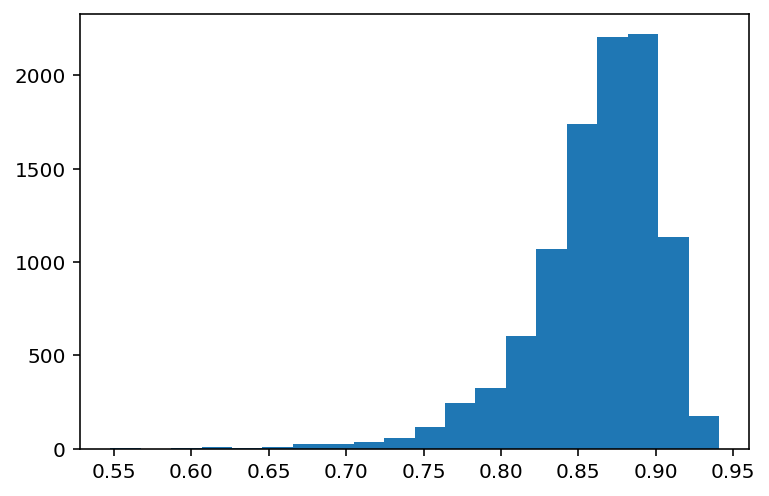

In [115]:
plt.hist(corrs,bins=20)

In [116]:
sum(corrs)/len(corrs)

0.8614212666013707

In [117]:
ssp.pearsonr(bfas.mean(axis=1),ssopg['opg'])

(0.7262301112727508, 8.065395531518385e-56)

In [118]:
pd.Series(corrs).quantile(.1)

0.8089814379477381

In [119]:
#bfas as factor analyzed

In [120]:
corrs2 = [ssp.pearsonr(bfasfa.sample(10,axis=1).mean(axis=1),gfp)[0] for i in range(10000)]

In [121]:
sum(corrs2)/len(corrs2)

0.8322163536895658

In [131]:
pd.Series(corrs2).quantile(0.41)

0.832634098595985

(array([2.000e+00, 0.000e+00, 2.000e+00, 1.800e+01, 5.300e+01, 1.740e+02,
        6.410e+02, 1.910e+03, 4.756e+03, 2.444e+03]),
 array([0.25622295, 0.32532841, 0.39443387, 0.46353933, 0.53264479,
        0.60175025, 0.67085571, 0.73996117, 0.80906663, 0.87817209,
        0.94727755]),
 <BarContainer object of 10 artists>)

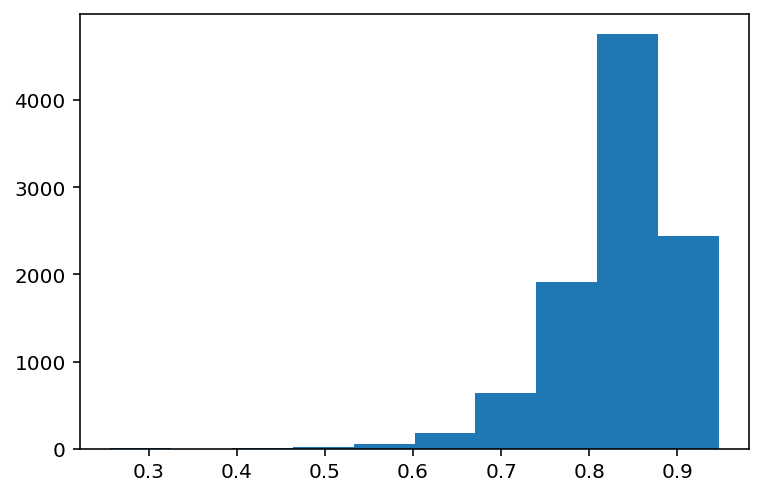

In [132]:
plt.hist(corrs2)

In [ ]:
#what about the GFP of the rest of the items!

In [86]:
bfas.columns

Index(['workerid', 'BFAS-1+', 'BFAS-10-', 'BFAS-100-', 'BFAS-101-', 'BFAS-11+',
       'BFAS-12+', 'BFAS-13+', 'BFAS-14+', 'BFAS-15+',
       ...
       'BFAS-97+', 'BFAS-98-', 'BFAS-99-', 'BFAS-F7-', 'BFAS-F83+',
       'BFAS-F84+', 'BFAS-F85+', 'BFAS-F86+', 'BFAS-F87-', 'opg'],
      dtype='object', length=102)

In [142]:
def montecarloanalysis(n):
    #uses the BFAS AS WRITTEN
    sample = BFAS.sample(n,axis=1)
    scols = sample.columns.values.tolist()
    othercols = BFAS.columns.difference(scols)
    computed_gfp = BFAS[othercols].mean(axis=1)
    return ssp.pearsonr(computed_gfp,sample.mean(axis=1))[0]

In [153]:
mca = [montecarloanalysis(10) for x in range(1000)]

In [154]:
sum(mca)/len(mca)

0.8263408008033164

(array([  1.,   3.,   7.,   9.,  34.,  91., 170., 353., 283.,  49.]),
 array([0.55542751, 0.5923713 , 0.6293151 , 0.66625889, 0.70320268,
        0.74014647, 0.77709027, 0.81403406, 0.85097785, 0.88792164,
        0.92486544]),
 <BarContainer object of 10 artists>)

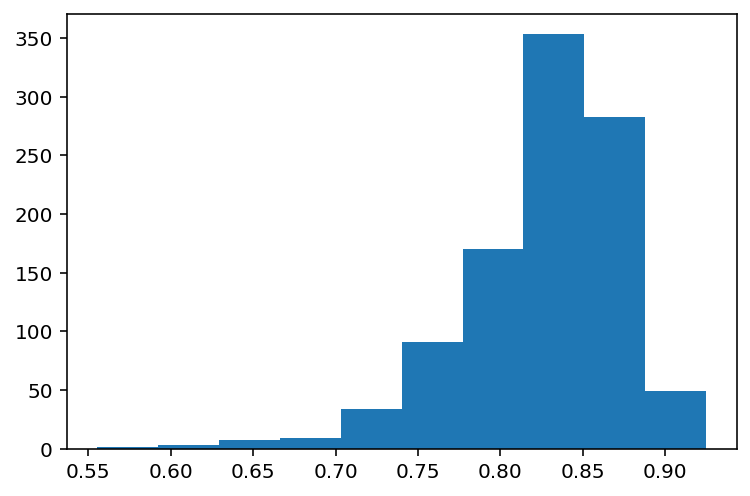

In [155]:
plt.hist(mca)

In [165]:
pd.Series(mca).quantile(.1)

0.762283266431511

In [159]:
def montecarloanalysis2(n):
    #uses the BFAS AS WRITTEN
    sample = bfasfa.sample(n,axis=1)
    scols = sample.columns.values.tolist()
    othercols = bfasfa.columns.difference(scols)
    computed_gfp = bfasfa[othercols].mean(axis=1)
    return ssp.pearsonr(computed_gfp,sample.mean(axis=1))[0]

In [160]:
mca2 = [montecarloanalysis2(10) for x in range(1000)]

In [161]:
sum(mca2)/len(mca2)

0.809938481587976

In [162]:
ssp.pearsonr(bfasfa.mean(axis=1),ssopg['opg'])

(0.6806771146727122, 1.1884498711794979e-46)

In [163]:
pd.Series(mca2).quantile(.1)

0.7269982878855539

In [104]:
OPG = opg.iloc[:,1:].mean(axis=1)

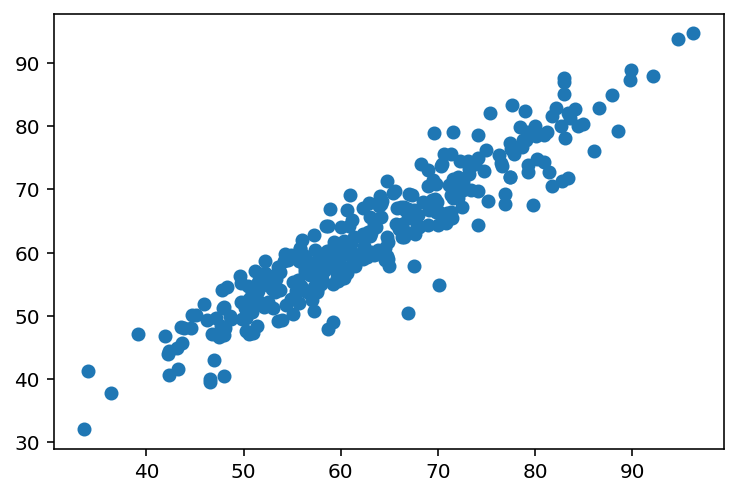

In [86]:
plt.scatter(BFAS.sample(19,axis=1).mean(axis=1),gfp)

In [36]:
bfas['opg'] = ssopg['opg']

In [ ]:
sp.stats.pearsonr(bfas[''])

In [53]:
bfas.corr()

,BFAS-1+,BFAS-10-,BFAS-100-,BFAS-101-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-2+,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-3+,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-4+,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-5+,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-6+,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-8-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-88-,BFAS-89-,BFAS-9-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-F7-,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,opg
BFAS-1+,1.000000,0.599838,-0.039320,0.227525,0.456795,0.519328,0.405863,0.532162,0.514773,0.416019,0.405736,0.341069,0.369776,0.745641,0.297723,0.148295,0.210516,0.214611,0.190094,0.255382,0.289355,0.309417,0.302449,0.330100,0.537749,0.161315,0.126123,0.101478,0.140304,0.214566,0.399308,0.148636,0.284314,0.360904,0.179622,0.597311,0.146224,0.339197,0.342256,0.293148,0.182293,0.362524,0.358441,0.374971,0.274794,0.335094,0.763457,0.421164,0.077396,0.215724,0.116641,-0.069703,0.085423,0.045885,0.269805,-0.054161,-0.050649,0.644188,-0.038678,0.323519,0.360458,0.231754,0.303189,0.233471,0.240764,0.320114,0.172526,-0.003755,0.265671,0.159342,0.048253,0.229660,0.240142,0.135525,0.240116,0.047603,0.258356,0.209702,0.511534,0.177832,0.213446,0.380363,0.225644,0.354456,0.525825,0.176851,0.207761,0.146155,0.123209,-0.034780,0.189173,0.027303,0.147753,-0.049861,0.589402,0.290831,0.166274,0.200027,0.278846,0.257916,0.408990
BFAS-10-,0.599838,1.000000,-0.155313,0.087160,0.390638,0.329869,0.439278,0.400198,0.381200,0.357392,0.377898,0.379633,0.412355,0.565136,0.338038,0.162958,0.205110,0.192673,0.152333,0.254115,0.200812,0.160198,0.164392,0.234658,0.384026,0.041967,0.007955,0.056521,0.107532,0.185013,0.290472,0.095815,0.191168,0.182957,0.101067,0.439439,0.159005,0.217683,0.242432,0.255670,0.125863,0.274523,0.227002,0.327867,0.137825,0.275007,0.655689,0.334875,0.023093,0.120929,0.021666,-0.119595,-0.017086,-0.010858,0.115268,-0.171714,-0.125726,0.551583,-0.084982,0.327278,0.334705,0.239473,0.303794,0.243264,0.260805,0.261895,0.162314,-0.025409,0.249140,0.176947,0.104818,0.247643,0.215182,0.152551,0.225770,0.056677,0.173266,0.152644,0.410131,0.078540,0.151445,0.249981,0.167530,0.214814,0.524246,0.109966,0.082433,0.059236,0.007927,0.017134,0.144386,0.016259,0.111347,-0.177989,0.644996,0.255799,0.135630,0.212680,0.227504,0.150790,0.373533
BFAS-100-,-0.039320,-0.155313,1.000000,0.169446,-0.062939,-0.009496,-0.077546,-0.067749,-0.041085,-0.125548,-0.096768,-0.073997,-0.120223,-0.086036,-0.082486,0.158698,0.097795,0.071578,0.032370,0.028607,0.126233,0.161582,0.192480,0.067362,-0.010493,0.244114,-0.159723,0.076088,0.017080,-0.043879,-0.009789,0.062293,0.020267,0.104276,0.007982,-0.045203,0.044610,-0.097892,-0.099157,-0.080895,-0.166210,-0.219447,-0.113851,-0.159248,0.084701,-0.119290,-0.042251,-0.178793,-0.140955,-0.180138,-0.051718,-0.014885,-0.142879,-0.079990,-0.175389,-0.119594,-0.043163,-0.039476,-0.084972,-0.054874,-0.045858,0.040919,0.031981,0.073709,-0.038985,-0.023305,0.089707,0.155558,0.023371,-0.116290,-0.003046,-0.076709,-0.124987,-0.019777,-0.115616,-0.037025,0.003010,-0.028447,-0.171006,0.040510,0.024702,-0.055677,0.205518,0.162202,-0.150045,0.164831,0.013007,0.144928,0.246987,0.262492,0.177913,0.202782,0.179763,0.467703,-0.151813,0.082272,0.083614,0.005111,-0.081759,0.187066,0.032413
BFAS-101-,0.227525,0.087160,0.169446,1.000000,0.154090,0.236227,0.050537,0.240589,0.195133,0.173451,0.060805,0.149330,0.044720,0.171763,0.029331,0.382645,0.278969,0.321278,0.251277,0.288707,0.305293,0.330162,0.385990,0.349269,0.181247,0.258365,-0.050726,0.041537,0.0729

In [53]:
bfas.head()

,workerid,BFAS-1+,BFAS-10-,BFAS-100-,BFAS-101-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-2+,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-3+,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-4+,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-5+,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-6+,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-8-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-88-,BFAS-89-,BFAS-9-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-F7-,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,opg
0,A06844383SJTPQU97CMSO,8.85,10.41,86.02,9.97,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,45.04,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,89.25,69.43,58.85,70.32,60.41,66.65,89.81,69.54,69.99,39.81,10.86,70.55,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,9.47,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,30.68,40.26,26.67,66.04,28.23,74.11,35.36,90.14,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,90.03,64.64,90.70,89.37,88.25,89.70,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,9.08,90.37,90.14,65.87,90.26,91.04,81.845684
1,A10IJLXWZZTN6L,34.97,39.76,65.14,0.00,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,36.53,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,39.31,89.31,89.98,100.00,79.40,90.20,99.55,100.00,100.00,100.00,100.00,9.80,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,59.80,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,49.55,100.00,2.67,11.02,8.57,24.83,24.61,6.46,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,67.59,0.00,89.76,90.09,49.33,74.28,49.55,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,0.00,100.00,10.13,100.00,89.64,59.35,78.777211
2,A1102MP1CZI32V,58.80,40.65,67.82,60.24,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,40.87,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,32.63,82.52,66.93,75.61,65.70,66.48,83.41,34.41,77.62,70.49,67.26,31.40,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,28.40,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,37.81,78.51,40.65,55.90,67.26,73.72,68.37,71.83,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,62.58,34.52,67.37,60.58,25.50,59.02,30.96,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,41.20,39.98,60.36,49.78,53.67,67.48,59.035684
3,A1153ZIEQX0ZJ8,50.00,50.00,87.03,62.42,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,50.00,81.57,67.09,71.05,77.34,77.34,50.00,93.26,50.00,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,36.36,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,50.00,74.11,63.08,50.00,70.55,72.10,65.53,67.43,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,50.00,76.22,50.00,30.46,79.57,63.31,50.00,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,37.25,50.00,75.56,50.00,50.11,59.86,69.273737
4,A11ZAAI7X8HSM0,50.00,50.00,66.43,22.22,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,51.73,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,47.94,89.48,89.70,50.00,92.26,50.00,42.48,8.63,31.01,73.55,9.30,19.65,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,50.00,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,90.70,50.00,91.70,79.57,90.59,90.92,49.16,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,

In [45]:

correct_order_bfas = [
#'age','engagement',
 'BFAS-1+',
 'BFAS-2+',
 'BFAS-3+',
 'BFAS-4+',
 'BFAS-5+',
 'BFAS-6+',
 'BFAS-F7-',
 'BFAS-8-',
 'BFAS-9-',
 'BFAS-10-',
 'BFAS-11+',
 'BFAS-12+',
 'BFAS-13+',
 'BFAS-14+',
 'BFAS-15+',
 'BFAS-16+',
 'BFAS-17-',
 'BFAS-18-',
 'BFAS-19-',
 'BFAS-20-',
 'BFAS-21+',
 'BFAS-22+',
 'BFAS-23+',
 'BFAS-24+',
 'BFAS-25+',
 'BFAS-26-',
 'BFAS-27-',
 'BFAS-28-',
 'BFAS-29-',
 'BFAS-30-',
 'BFAS-31+',
 'BFAS-32+',
 'BFAS-33+',
 'BFAS-34+',
 'BFAS-35-',
 'BFAS-36-',
 'BFAS-37-',
 'BFAS-38-',
 'BFAS-39-',
 'BFAS-40-',
 'BFAS-41+',
 'BFAS-42+',
 'BFAS-43+',
 'BFAS-44+',
 'BFAS-45-',
 'BFAS-46-',
 'BFAS-47-',
 'BFAS-48-',
 'BFAS-49-',
 'BFAS-50-',
 'BFAS-51+',
 'BFAS-52+',
 'BFAS-53+',
 'BFAS-54+',
 'BFAS-55+',
 'BFAS-56+',
 'BFAS-57-',
 'BFAS-58-',
 'BFAS-59-',
 'BFAS-60-',
 'BFAS-61+',
 'BFAS-62+',
 'BFAS-63+',
 'BFAS-64+',
 'BFAS-65+',
 'BFAS-66-',
 'BFAS-67-',
 'BFAS-68-',
 'BFAS-69-',
 'BFAS-70-',
 'BFAS-71+',
 'BFAS-72+',
 'BFAS-73+',
 'BFAS-74+',
 'BFAS-75+',
 'BFAS-76+',
 'BFAS-77-',
 'BFAS-78-',
 'BFAS-79-',
 'BFAS-80-',
 'BFAS-81+',
 'BFAS-82+',
 'BFAS-F83+',
 'BFAS-F84+',
 'BFAS-F85+',
 'BFAS-F86+',
 'BFAS-F87-',
 'BFAS-88-',
 'BFAS-89-',
 'BFAS-90+',
 'BFAS-90-',#labeling was off by 1 here
 'BFAS-91+',
 'BFAS-92+',
 'BFAS-95+',
 'BFAS-96+',
 'BFAS-97+',
 'BFAS-98-',
 'BFAS-99-',
 'BFAS-100-',
 'BFAS-101-']

In [46]:
bfas = bfas[correct_order_bfas]

In [47]:
ssp.shapiro(bfas.mean(axis=1)) #approxrimately normal!

(0.9895297288894653, 0.01737065613269806)

In [48]:
bfas.mean(axis=1)

0      60.4929
1      57.8933
2      53.8851
3      55.7894
4      64.1790
        ...   
368    57.6644
369    44.5121
370    58.6951
371    79.2457
372    70.6823
Length: 333, dtype: float64

In [49]:
ssp.pearsonr(ssopg['opg'],bfas.mean(axis=1))

(0.7215707468207364, 8.474284905560648e-55)

In [50]:
ssp.spearmanr(ssopg['opg'],bfas.mean(axis=1))

SpearmanrResult(correlation=0.7363543833856222, pvalue=4.0979688905587354e-58)

In [51]:
NEUROTICISM = bfas.iloc[:,0:20]
AGREEABLENESS = bfas.iloc[:,20:40]
CONSCIENTIOUSNESS = bfas.iloc[:,40:60]
EXTRAVERSION = bfas.iloc[:,60:80]
OPENNESS = bfas.iloc[:,80:]

In [52]:
FACTORS = [NEUROTICISM,AGREEABLENESS,CONSCIENTIOUSNESS,EXTRAVERSION,OPENNESS]
factorlabels = ["NEUROTICISM","AGREEABLENESS","CONSCIENTIOUSNESS","EXTRAVERSION","OPENNESS"]

In [53]:
FACTORS[0]

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-
0,8.85,45.04,89.25,70.55,9.47,30.68,9.08,90.03,89.70,10.41,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,88.59
1,34.97,36.53,39.31,9.80,59.80,49.55,0.00,67.59,49.55,39.76,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,0.00
2,58.80,40.87,32.63,31.40,28.40,37.81,41.20,62.58,30.96,40.65,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,29.84
3,50.00,50.00,50.00,50.00,36.36,50.00,37.25,50.00,50.00,50.00,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00
4,50.00,51.73,47.94,19.65,50.00,50.00,10.08,90.70,49.16,50.00,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,50.00,40.03,50.00,40.48,43.15,41.93,42.93,37.03,43.26,43.15,37.36,45.04,38.36,34.80,38.08,42.93,39.70,50.00,35.91,42.15
369,0.00,0.00,64.75,64.85,0.00,0.00,0.00,0.00,10.02,0.00,0.00,0.00,0.00,0.00,9.84,90.26,0.00,0.00,0.00,0.00
370,80.29,40.20,50.11,50.00,30.18,35.63,54.45,39.76,54.90,54.57,35.30,24.61,9.80,44.77,19.93,19.71,54.79,74.50,69.49,9.69
371,89.98,100.00,100.00,100.00,100.00,100.00,42.98,89.64,91.43,74.28,99.78,100.00,35.41,100.00,91.20,100.00,80.18,92.59,74.83,35.08


In [54]:
for label,factor in zip(factorlabels,FACTORS):
    print("\n")
    print(label)
    means = factor.mean(axis=1,numeric_only=True)
    print(ssp.stats.pearsonr(means.values,ssopg['opg'].values))
    print(ssp.stats.spearmanr(means,ssopg['opg']))
    #Problem is that some reversed items were double reversed?



NEUROTICISM
(0.5193109087898999, 2.1570742091195993e-24)
SpearmanrResult(correlation=0.5207075266594782, pvalue=1.5474952496677301e-24)


AGREEABLENESS
(0.5961627940275828, 1.997193779541194e-33)
SpearmanrResult(correlation=0.6269008710030283, pvalue=9.113372737755825e-38)


CONSCIENTIOUSNESS
(0.5070861521790159, 3.70153828257315e-23)
SpearmanrResult(correlation=0.4980804020484286, pvalue=2.7960601503441443e-22)


EXTRAVERSION
(0.45284508648279626, 3.0576100688889383e-18)
SpearmanrResult(correlation=0.4660678642714571, pvalue=2.3233327407358196e-19)


OPENNESS
(0.5403379966812322, 1.2301752428809803e-26)
SpearmanrResult(correlation=0.5456768000956732, pvalue=3.1244629059857256e-27)


In [55]:
bfas_cols = correct_order_bfas

In [56]:
bfas_cols

['BFAS-1+',
 'BFAS-2+',
 'BFAS-3+',
 'BFAS-4+',
 'BFAS-5+',
 'BFAS-6+',
 'BFAS-F7-',
 'BFAS-8-',
 'BFAS-9-',
 'BFAS-10-',
 'BFAS-11+',
 'BFAS-12+',
 'BFAS-13+',
 'BFAS-14+',
 'BFAS-15+',
 'BFAS-16+',
 'BFAS-17-',
 'BFAS-18-',
 'BFAS-19-',
 'BFAS-20-',
 'BFAS-21+',
 'BFAS-22+',
 'BFAS-23+',
 'BFAS-24+',
 'BFAS-25+',
 'BFAS-26-',
 'BFAS-27-',
 'BFAS-28-',
 'BFAS-29-',
 'BFAS-30-',
 'BFAS-31+',
 'BFAS-32+',
 'BFAS-33+',
 'BFAS-34+',
 'BFAS-35-',
 'BFAS-36-',
 'BFAS-37-',
 'BFAS-38-',
 'BFAS-39-',
 'BFAS-40-',
 'BFAS-41+',
 'BFAS-42+',
 'BFAS-43+',
 'BFAS-44+',
 'BFAS-45-',
 'BFAS-46-',
 'BFAS-47-',
 'BFAS-48-',
 'BFAS-49-',
 'BFAS-50-',
 'BFAS-51+',
 'BFAS-52+',
 'BFAS-53+',
 'BFAS-54+',
 'BFAS-55+',
 'BFAS-56+',
 'BFAS-57-',
 'BFAS-58-',
 'BFAS-59-',
 'BFAS-60-',
 'BFAS-61+',
 'BFAS-62+',
 'BFAS-63+',
 'BFAS-64+',
 'BFAS-65+',
 'BFAS-66-',
 'BFAS-67-',
 'BFAS-68-',
 'BFAS-69-',
 'BFAS-70-',
 'BFAS-71+',
 'BFAS-72+',
 'BFAS-73+',
 'BFAS-74+',
 'BFAS-75+',
 'BFAS-76+',
 'BFAS-77-',
 'BFAS-

In [57]:
stability_columns = bfas_cols[1:][0:20] ## THIS WOULD APPEAR TO BE THE BUG
openness_columns = bfas_cols[1:][80:]
extro_columns = bfas_cols[1:][60:80]
conci_columns = bfas_cols[1:][40:60]
agree_columns = bfas_cols[1:][20:40]

In [58]:
stability_columns

['BFAS-2+',
 'BFAS-3+',
 'BFAS-4+',
 'BFAS-5+',
 'BFAS-6+',
 'BFAS-F7-',
 'BFAS-8-',
 'BFAS-9-',
 'BFAS-10-',
 'BFAS-11+',
 'BFAS-12+',
 'BFAS-13+',
 'BFAS-14+',
 'BFAS-15+',
 'BFAS-16+',
 'BFAS-17-',
 'BFAS-18-',
 'BFAS-19-',
 'BFAS-20-',
 'BFAS-21+']

In [88]:
len(bfas)

333

In [60]:

# In[24]:

df_stable = bfas[stability_columns]
df_open = bfas[openness_columns]
df_extro = bfas[extro_columns]
df_conci = bfas[conci_columns]
df_agree = bfas[agree_columns]


# In[25]:

df_stable['stability'] = df_stable.mean(axis=1)
df_open['openness'] = df_open.mean(axis=1) 
df_extro['extro'] = df_extro.mean(axis=1)
df_conci['conci'] = df_conci.mean(axis=1)
df_agree['agree'] = df_agree.mean(axis=1)


# In[26]:

measures = [df_stable['stability'],df_open['openness'],df_extro['extro'],df_conci['conci'],df_agree['agree']]


# In[27]:

for construct in measures:
    print (ssp.pearsonr(ssopg['opg'],construct))

(0.5407378031017971, 1.1111228397979195e-26)
(0.540906591273496, 1.0643443200084606e-26)
(0.4574164731242211, 1.270310669980776e-18)
(0.5110451835031434, 1.4928518124324922e-23)
(0.6154399071821579, 4.3063060549187755e-36)


<ipython-input-60-63d2d8e7ec72>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stable['stability'] = df_stable.mean(axis=1)
<ipython-input-60-63d2d8e7ec72>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open['openness'] = df_open.mean(axis=1)
<ipython-input-60-63d2d8e7ec72>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

## AS FACTOR ANALYZED

In [74]:
neuro_lbl = ['BFAS.5.',
 'BFAS.2.',
 'BFAS.1.',
 'BFAS.6.',
 'BFAS.4.',
 'BFAS.3.',
 'BFAS.15.',
 'BFAS.10.',
 'BFAS.13.',
 'BFAS.F7.',
 'BFAS.11.',
 'BFAS.14.',
 'BFAS.12.',
 'BFAS.17.',
 'BFAS.9.',
 'BFAS.16.',
 'BFAS.8.',
 'BFAS.19.',
 'BFAS.50.',
 'BFAS.20.',
 'BFAS.18.',
 'BFAS.47.',
 'BFAS.49.']


neurols = [5,2,1,6,4,3,15,10,13,7,11,14,12,17,9,16,8,19,50,20,18,47,49] 

agree_lbl =['BFAS.26.',
 'BFAS.23.',
 'BFAS.28.',
 'BFAS.27.',
 'BFAS.22.',
 'BFAS.21.',
 'BFAS.24.',
 'BFAS.25.',
 'BFAS.29.',
 'BFAS.30.',
 'BFAS.37.',
 'BFAS.40.',
 'BFAS.63.',
 'BFAS.91.',
 'BFAS.62.',
 'BFAS.35.',
 'BFAS.68.',
 'BFAS.67.',
 'BFAS.101.',
 'BFAS.90.',
 'BFAS.96.',
 'BFAS.98.',
 'BFAS.69.']



agree_ls = [26,23,28,27,22,21,24,25,29,30,37,40,63,91,62,35,68,67,100,90,95,97,69] 
#96,98 and 101 are mislabled; their index is adjusted by -1

extra_lbl = ['BFAS.73.',
 'BFAS.75.',
 'BFAS.71.',
 'BFAS.74.',
 'BFAS.72.',
 'BFAS.77.',
 'BFAS.78.',
 'BFAS.76.',
 'BFAS.79.',
 'BFAS.61.',
 'BFAS.80.',
 'BFAS.64.',
 'BFAS.F85.',
 'BFAS.70.',
 'BFAS.65.',
 'BFAS.44.',
 'BFAS.38.',
 'BFAS.32.',
 'BFAS.34.',
 'BFAS.36.',
 'BFAS.33.',
 'BFAS.39.']



extra_ls = [73,75,71,74,72,77,78,76,79,61,80,64,85,70,65,44,38,32,34,36,33,39]

conci_lbl = ['BFAS.51.',
 'BFAS.52.',
 'BFAS.56.',
 'BFAS.53.',
 'BFAS.54.',
 'BFAS.31.',
 'BFAS.55.',
 'BFAS.57.',
 'BFAS.42.',
 'BFAS.58.',
 'BFAS.41.',
 'BFAS.59.',
 'BFAS.60.',
 'BFAS.45.',
 'BFAS.46.',
 'BFAS.F86.',
 'BFAS.43.',
 'BFAS.48.',
 'BFAS.100.']


conci_ls = [51,52,56,53,54,31,55,57,42,58,41,59,60,45,46,86,43,48,99]

opn_lbl = ['BFAS.F87.',
 'BFAS.F83.',
 'BFAS.88.',
 'BFAS.81.',
 'BFAS.82.',
 'BFAS.97.',
 'BFAS.89.',
 'BFAS.F84.',
 'BFAS.92.',
 'BFAS.90..1',
 'BFAS.99.',
 'BFAS.95.',
 'BFAS.66.']
opn_ls = [87,83,88,81,82,96,89,84,93,91,98,94,66]

In [61]:
bfasfa = bfas.copy(True)

In [62]:
#columns to reverse so that they point towards their named factor
#Raw Items were already reversed
#All Neuroticism items were then reversed again
## ONLY WHEN SCORING AS FACTOR ANALYZED
rv_cols = [38,32,34,36,33,39,99,66]


In [63]:
colz = bfasfa.columns.values.tolist()

In [64]:
reverse = [correct_order_bfas[x-1] for x in rv_cols]

In [65]:
for l in reverse:
    bfasfa[l] = 100 - bfasfa[l]

In [70]:
bfasfa.columns

Index(['BFAS-1+', 'BFAS-2+', 'BFAS-3+', 'BFAS-4+', 'BFAS-5+', 'BFAS-6+',
       'BFAS-F7-', 'BFAS-8-', 'BFAS-9-', 'BFAS-10-', 'BFAS-11+', 'BFAS-12+',
       'BFAS-13+', 'BFAS-14+', 'BFAS-15+', 'BFAS-16+', 'BFAS-17-', 'BFAS-18-',
       'BFAS-19-', 'BFAS-20-', 'BFAS-21+', 'BFAS-22+', 'BFAS-23+', 'BFAS-24+',
       'BFAS-25+', 'BFAS-26-', 'BFAS-27-', 'BFAS-28-', 'BFAS-29-', 'BFAS-30-',
       'BFAS-31+', 'BFAS-32+', 'BFAS-33+', 'BFAS-34+', 'BFAS-35-', 'BFAS-36-',
       'BFAS-37-', 'BFAS-38-', 'BFAS-39-', 'BFAS-40-', 'BFAS-41+', 'BFAS-42+',
       'BFAS-43+', 'BFAS-44+', 'BFAS-45-', 'BFAS-46-', 'BFAS-47-', 'BFAS-48-',
       'BFAS-49-', 'BFAS-50-', 'BFAS-51+', 'BFAS-52+', 'BFAS-53+', 'BFAS-54+',
       'BFAS-55+', 'BFAS-56+', 'BFAS-57-', 'BFAS-58-', 'BFAS-59-', 'BFAS-60-',
       'BFAS-61+', 'BFAS-62+', 'BFAS-63+', 'BFAS-64+', 'BFAS-65+', 'BFAS-66-',
       'BFAS-67-', 'BFAS-68-', 'BFAS-69-', 'BFAS-70-', 'BFAS-71+', 'BFAS-72+',
       'BFAS-73+', 'BFAS-74+', 'BFAS-75+', 'BFAS-76+', 'BFAS

In [71]:
gfpfa = bfasfa.mean(axis=1,numeric_only=True)

In [72]:
#MAIN CORRELATION
ssp.pearsonr(ssopg['opg'],gfpfa)

(0.6806771146727122, 1.1884498711794979e-46)

In [80]:
bfasfa.iloc[:,[x-1 for x in opn_ls]]

,BFAS-F87-,BFAS-F83+,BFAS-88-,BFAS-81+,BFAS-82+,BFAS-97+,BFAS-89-,BFAS-F84+,BFAS-92+,BFAS-90-,BFAS-99-,BFAS-95+,BFAS-66-
0,91.04,90.37,88.25,90.70,89.37,89.59,89.70,90.14,89.14,90.37,91.04,75.11,9.86
1,59.35,100.00,49.33,89.76,90.09,9.80,74.28,10.13,100.00,89.76,85.19,29.40,93.54
2,67.48,39.98,25.50,67.37,60.58,71.49,59.02,60.36,55.12,33.63,71.83,88.75,28.17
3,59.86,50.00,79.57,50.00,30.46,80.57,63.31,75.56,50.17,50.00,69.54,49.89,32.57
4,89.70,90.14,90.59,91.70,79.57,50.00,90.92,90.59,56.29,88.47,77.90,70.77,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,85.91,75.11,74.89,70.32,64.98,74.33,89.92,78.34,74.89,85.02,69.77,89.81,45.60
369,89.98,0.27,9.93,89.62,10.02,89.80,9.84,100.00,59.47,35.25,100.00,89.89,9.88
370,69.82,80.18,70.27,80.07,74.72,69.82,80.07,90.31,84.86,79.84,64.59,70.38,74.94
371,100.00,100.00,100.00,100.00,98.55,100.00,98.33,100.00,63.03,100.00,61.14,98.11,59.80


In [87]:
fdf_stable = bfasfa.iloc[:,[x-1 for x in neurols]]
fdf_open = bfasfa.iloc[:,[x-1 for x in opn_ls]]
fdf_extro = bfasfa.iloc[:,[x-1 for x in extra_ls]]
fdf_conci = bfasfa.iloc[:,[x-1 for x in conci_ls ]]
fdf_agree = bfasfa.iloc[:,[x-1 for x in agree_ls]]


# In[25]:

fdf_stable['stability'] = fdf_stable.mean(axis=1)
fdf_open['openness'] = fdf_open.mean(axis=1) 
fdf_extro['extro'] = fdf_extro.mean(axis=1)
fdf_conci['conci'] = fdf_conci.mean(axis=1)
fdf_agree['agree'] = fdf_agree.mean(axis=1)


# In[26]:

fmeasures = [fdf_stable['stability'],fdf_open['openness'],fdf_extro['extro'],fdf_conci['conci'],fdf_agree['agree']]


# In[27]:

for construct,label in zip(fmeasures,['STABILITY','OPENNESS','EXTROVERSION','CONSCIENTIOUSNESS','AGREEABLENESS']):
    print("\n")
    print(label)
    print (ssp.pearsonr(ssopg['opg'],construct))
    print (ssp.spearmanr(ssopg['opg'],construct))
    



STABILITY
(0.5412226114069074, 9.819278855250222e-27)
SpearmanrResult(correlation=0.5374625657072852, pvalue=2.5477624948858377e-26)


OPENNESS
(0.46915662432079186, 1.2519444175555205e-19)
SpearmanrResult(correlation=0.4761541716306885, pvalue=3.013609865725078e-20)


EXTROVERSION
(0.2690603902388111, 6.240244615018508e-07)
SpearmanrResult(correlation=0.2641223576942501, pvalue=1.0148229865822635e-06)


CONSCIENTIOUSNESS
(0.4715319632652279, 7.748595695253889e-20)
SpearmanrResult(correlation=0.46225133581745664, pvalue=4.945062630491699e-19)


AGREEABLENESS
(0.6335571331474774, 9.010686199352075e-39)
SpearmanrResult(correlation=0.6678967041494999, pvalue=2.265117128239465e-44)


<ipython-input-87-3a015fa0f099>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf_stable['stability'] = fdf_stable.mean(axis=1)
<ipython-input-87-3a015fa0f099>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf_open['openness'] = fdf_open.mean(axis=1)
<ipython-input-87-3a015fa0f099>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [76]:
bfasfa

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-100-,BFAS-101-
0,8.85,45.04,89.25,70.55,9.47,30.68,9.08,90.03,89.70,10.41,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,69.43,58.85,29.68,39.59,33.35,89.81,30.46,69.99,60.19,89.14,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,40.26,26.67,66.04,28.23,74.11,35.36,9.86,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,64.64,90.70,89.37,90.37,90.14,65.87,90.26,91.04,88.25,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,13.98,9.97
1,34.97,36.53,39.31,9.80,59.80,49.55,0.00,67.59,49.55,39.76,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,89.31,89.98,0.00,20.60,9.80,99.55,0.00,100.00,0.00,0.00,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,100.00,2.67,11.02,8.57,24.83,24.61,93.54,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,0.00,89.76,90.09,100.00,10.13,100.00,89.64,59.35,49.33,74.28,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,34.86,0.00
2,58.80,40.87,32.63,31.40,28.40,37.81,41.20,62.58,30.96,40.65,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,82.52,66.93,24.39,34.30,33.52,83.41,65.59,77.62,29.51,32.74,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,78.51,40.65,55.90,67.26,73.72,68.37,28.17,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,34.52,67.37,60.58,39.98,60.36,49.78,53.67,67.48,25.50,59.02,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,32.18,60.24
3,50.00,50.00,50.00,50.00,36.36,50.00,37.25,50.00,50.00,50.00,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,18.43,32.91,28.95,77.34,22.66,50.00,6.74,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,74.11,63.08,50.00,70.55,72.10,65.53,32.57,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,76.22,50.00,30.46,50.00,75.56,50.00,50.11,59.86,79.57,63.31,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,12.97,62.42
4,50.00,51.73,47.94,19.65,50.00,50.00,10.08,90.70,49.16,50.00,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,89.48,89.70,50.00,7.74,50.00,42.48,91.37,31.01,26.45,90.70,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,50.00,91.70,79.57,90.14,90.59,89.81,50.00,89.70,90.59,90.92,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,33.57,22.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [113]:
altdf = pd.read_csv("../Processing_FAnalysis_Correlations/bfas_study_I.csv")

In [114]:
altdf = altdf[correct_order_bfas]

In [115]:
ssp.stats.pearsonr(altdf.iloc[:,0:20].mean(axis=1),ssopg['opg'])

(0.5193109087898999, 2.1570742091195993e-24)

In [116]:
altdf.head()

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-100-,BFAS-101-
0,8.85,45.04,89.25,70.55,9.47,30.68,9.08,90.03,89.70,10.41,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,69.43,58.85,70.32,60.41,66.65,89.81,69.54,69.99,39.81,10.86,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,40.26,26.67,66.04,28.23,74.11,35.36,90.14,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,64.64,90.70,89.37,90.37,90.14,65.87,90.26,91.04,88.25,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,86.02,9.97
1,34.97,36.53,39.31,9.80,59.80,49.55,0.00,67.59,49.55,39.76,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,89.31,89.98,100.00,79.40,90.20,99.55,100.00,100.00,100.00,100.00,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,100.00,2.67,11.02,8.57,24.83,24.61,6.46,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,0.00,89.76,90.09,100.00,10.13,100.00,89.64,59.35,49.33,74.28,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,65.14,0.00
2,58.80,40.87,32.63,31.40,28.40,37.81,41.20,62.58,30.96,40.65,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,82.52,66.93,75.61,65.70,66.48,83.41,34.41,77.62,70.49,67.26,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,78.51,40.65,55.90,67.26,73.72,68.37,71.83,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,34.52,67.37,60.58,39.98,60.36,49.78,53.67,67.48,25.50,59.02,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,67.82,60.24
3,50.00,50.00,50.00,50.00,36.36,50.00,37.25,50.00,50.00,50.00,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,81.57,67.09,71.05,77.34,77.34,50.00,93.26,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,74.11,63.08,50.00,70.55,72.10,65.53,67.43,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,76.22,50.00,30.46,50.00,75.56,50.00,50.11,59.86,79.57,63.31,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,87.03,62.42
4,50.00,51.73,47.94,19.65,50.00,50.00,10.08,90.70,49.16,50.00,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,89.48,89.70,50.00,92.26,50.00,42.48,8.63,31.01,73.55,9.30,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,50.00,91.70,79.57,90.14,90.59,89.81,50.00,89.70,90.59,90.92,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,66.43,22.22


In [118]:
bfas.head()

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-100-,BFAS-101-
0,8.85,45.04,89.25,70.55,9.47,30.68,9.08,90.03,89.70,10.41,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,69.43,58.85,70.32,60.41,66.65,89.81,69.54,69.99,39.81,10.86,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,40.26,26.67,66.04,28.23,74.11,35.36,90.14,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,64.64,90.70,89.37,90.37,90.14,65.87,90.26,91.04,88.25,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,86.02,9.97
1,34.97,36.53,39.31,9.80,59.80,49.55,0.00,67.59,49.55,39.76,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,89.31,89.98,100.00,79.40,90.20,99.55,100.00,100.00,100.00,100.00,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,100.00,2.67,11.02,8.57,24.83,24.61,6.46,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,0.00,89.76,90.09,100.00,10.13,100.00,89.64,59.35,49.33,74.28,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,65.14,0.00
2,58.80,40.87,32.63,31.40,28.40,37.81,41.20,62.58,30.96,40.65,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,82.52,66.93,75.61,65.70,66.48,83.41,34.41,77.62,70.49,67.26,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,78.51,40.65,55.90,67.26,73.72,68.37,71.83,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,34.52,67.37,60.58,39.98,60.36,49.78,53.67,67.48,25.50,59.02,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,67.82,60.24
3,50.00,50.00,50.00,50.00,36.36,50.00,37.25,50.00,50.00,50.00,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,81.57,67.09,71.05,77.34,77.34,50.00,93.26,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,74.11,63.08,50.00,70.55,72.10,65.53,67.43,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,76.22,50.00,30.46,50.00,75.56,50.00,50.11,59.86,79.57,63.31,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,87.03,62.42
4,50.00,51.73,47.94,19.65,50.00,50.00,10.08,90.70,49.16,50.00,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,89.48,89.70,50.00,92.26,50.00,42.48,8.63,31.01,73.55,9.30,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,50.00,91.70,79.57,90.14,90.59,89.81,50.00,89.70,90.59,90.92,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,66.43,22.22


In [123]:
import seaborn as sns
sns.set_style("whitegrid")

In [124]:
bfas['mean'] = bfas.mean(axis=1)

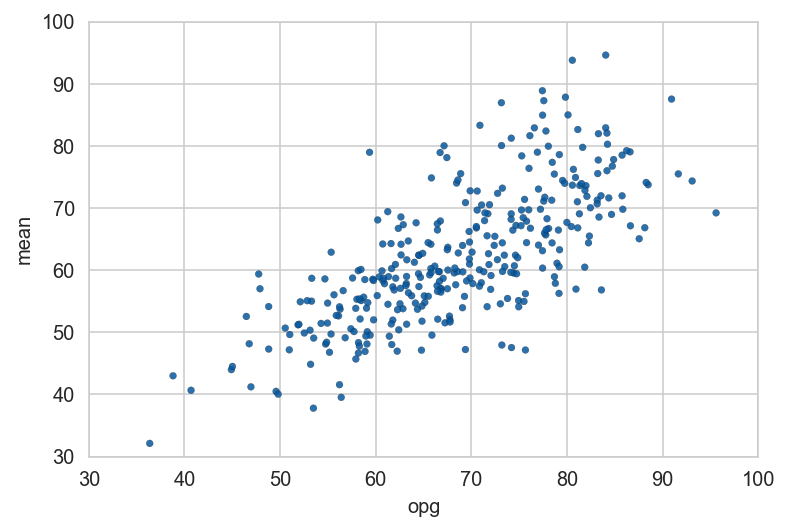

In [125]:
plt.ylim(30, 100)
plt.xlim(30, 100)
p = sns.scatterplot(ssopg['opg'],bfas['mean'],
               s=12,
               alpha=.85,
               hue = ['a' for x in range(len(ssopg)) ],
               palette={'a':"#08589e"},
               edgecolor='k',
               linewidth=.1,)
p.legend_.remove()

In [127]:
bfas_corr

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-100-,BFAS-101-,mean
BFAS-1+,1.000000,0.745641,0.537749,0.597311,0.763457,0.644188,0.589402,0.511534,0.525825,0.599838,0.456795,0.519328,0.405863,0.532162,0.514773,0.416019,0.405736,0.341069,0.369776,0.297723,0.148295,0.210516,0.214611,0.190094,0.255382,0.289355,0.309417,0.302449,0.330100,0.161315,0.126123,0.101478,0.140304,0.214566,0.399308,0.148636,0.284314,0.360904,0.179622,0.146224,0.339197,0.342256,0.293148,0.182293,0.362524,0.358441,0.374971,0.274794,0.335094,0.421164,0.077396,0.215724,0.116641,-0.069703,0.085423,0.045885,0.269805,-0.054161,-0.050649,-0.038678,0.323519,0.360458,0.231754,0.303189,0.233471,0.240764,0.320114,0.172526,-0.003755,0.265671,0.159342,0.048253,0.229660,0.240142,0.135525,0.240116,0.047603,0.258356,0.209702,0.177832,0.213446,0.380363,0.290831,0.166274,0.200027,0.278846,0.257916,0.225644,0.354456,0.176851,0.207761,0.146155,0.123209,-0.034780,0.189173,0.027303,0.147753,-0.049861,-0.039320,0.227525,0.599408
BFAS-2+,0.745641,1.000000,0.659937,0.673661,0.751937,0.635678,0.532288,0.618668,0.552117,0.565136,0.506486,0.638382,0.492250,0.638486,0.636594,0.523538,0.527822,0.403881,0.492190,0.439901,0.100557,0.190636,0.118161,0.140093,0.230880,0.194862,0.242673,0.209260,0.254754,0.110462,0.121291,0.011285,0.017077,0.130877,0.283143,0.069994,0.199609,0.227359,0.016152,0.130866,0.411277,0.424193,0.402920,0.226475,0.419872,0.423841,0.423348,0.284560,0.400707,0.476684,0.009805,0.205814,0.140950,-0.023502,0.092657,-0.010751,0.328393,-0.079701,-0.121567,-0.034678,0.357482,0.326024,0.188394,0.321933,0.213933,0.262035,0.290591,0.130521,-0.004270,0.260539,0.233150,0.153476,0.258217,0.282329,0.211248,0.323006,0.199386,0.282833,0.337323,0.229311,0.281111,0.416394,0.333287,0.208946,0.310652,0.367712,0.298410,0.234574,0.378143,0.188931,0.237650,0.066307,0.103120,0.027774,0.123586,0.045778,0.093246,-0.058658,-0.086036,0.171763,0.628165
BFAS-3+,0.537749,0.659937,1.000000,0.807737,0.606680,0.473805,0.409231,0.513471,0.485857,0.384026,0.469237,0.479356,0.413138,0.566156,0.588450,0.474877,0.567518,0.384489,0.502657,0.365743,0.166747,0.220506,0.132504,0.154399,0.173837,0.194557,0.259802,0.256854,0.232636,0.075383,0.181541,-0.013240,0.043711,0.118179,0.246642,0.106742,0.145343,0.263670,0.040095,0.104302,0.450146,0.453667,0.360037,0.230092,0.333309,0.431205,0.379588,0.373679,0.393282,0.472877,0.130369,0.211750,0.151067,0.012751,0.180629,0.073111,0.306136,0.015115,0.013074,0.054736,0.287036,0.231051,0.078942,0.217946,0.155354,0.294075,0.338927,0.215491,-0.021998,0.254644,0.191921,0.140047,0.183161,0.217942,0.148857,0.292856,0.198994,0.240891,0.278982,0.299589,0.335812,0.295514,0.208696,0.218624,0.290136,0.341361,0.291418,0.202767,0.317298,0.150010,0.314939,0.038722,0.134969,0.007078,0.063796,-0.001338,0.080752,-0.045922,-0.010493,0.181247,0.591632
BFAS-4+,0.597311,0.673661,0.807737,1.000000,0.628499,0.535010,0.441891,0.529519,0.510890,0.439439,0.497839,0.505861,0.420803,0.603348,0.566188,0.468924,0.595984,0.430121,0.556947,0.368869,0.122196,0.238833,0.146742,0.169872,0.176214,0.215737,0.279780,0.232122,0.299038,0.049682,0.178772,0.019964,0.034910,0.058354,0.249932,

In [135]:
bfas

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-100-,BFAS-101-,mean
0,8.85,45.04,89.25,70.55,9.47,30.68,9.08,90.03,89.70,10.41,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,69.43,58.85,70.32,60.41,66.65,89.81,69.54,69.99,39.81,10.86,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,40.26,26.67,66.04,28.23,74.11,35.36,90.14,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,64.64,90.70,89.37,90.37,90.14,65.87,90.26,91.04,88.25,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,86.02,9.97,60.4929
1,34.97,36.53,39.31,9.80,59.80,49.55,0.00,67.59,49.55,39.76,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,89.31,89.98,100.00,79.40,90.20,99.55,100.00,100.00,100.00,100.00,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,100.00,2.67,11.02,8.57,24.83,24.61,6.46,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,0.00,89.76,90.09,100.00,10.13,100.00,89.64,59.35,49.33,74.28,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,65.14,0.00,57.8933
2,58.80,40.87,32.63,31.40,28.40,37.81,41.20,62.58,30.96,40.65,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,82.52,66.93,75.61,65.70,66.48,83.41,34.41,77.62,70.49,67.26,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,78.51,40.65,55.90,67.26,73.72,68.37,71.83,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,34.52,67.37,60.58,39.98,60.36,49.78,53.67,67.48,25.50,59.02,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,67.82,60.24,53.8851
3,50.00,50.00,50.00,50.00,36.36,50.00,37.25,50.00,50.00,50.00,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,81.57,67.09,71.05,77.34,77.34,50.00,93.26,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,74.11,63.08,50.00,70.55,72.10,65.53,67.43,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,76.22,50.00,30.46,50.00,75.56,50.00,50.11,59.86,79.57,63.31,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,87.03,62.42,55.7894
4,50.00,51.73,47.94,19.65,50.00,50.00,10.08,90.70,49.16,50.00,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,89.48,89.70,50.00,92.26,50.00,42.48,8.63,31.01,73.55,9.30,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,50.00,91.70,79.57,90.14,90.59,89.81,50.00,89.70,90.59,90.92,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,66.43,22.22,64.1790
...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [129]:
#bfascorr = bfas_corr['opg'].values

In [136]:
bfas['opg'] = ssopg['opg']

In [137]:
bfas_corr = bfas.corr()

BFAS-1+      0.408990
BFAS-2+      0.470110
BFAS-3+      0.385665
BFAS-4+      0.398682
BFAS-5+      0.428738
               ...   
BFAS-97+     0.246888
BFAS-98-     0.224516
BFAS-99-     0.082171
BFAS-100-    0.032413
BFAS-101-    0.361386
Name: opg, Length: 100, dtype: float64

In [147]:
bfas_omega = pd.read_csv("./BFAS_I_OMEGA_5.csv")

In [148]:
bfasg = bfas_omega['g'].values

In [149]:
ssp.pearsonr(bfasg,bfas_corr['opg'].iloc[0:-2])

(0.7307225933638177, 6.17582841886634e-18)

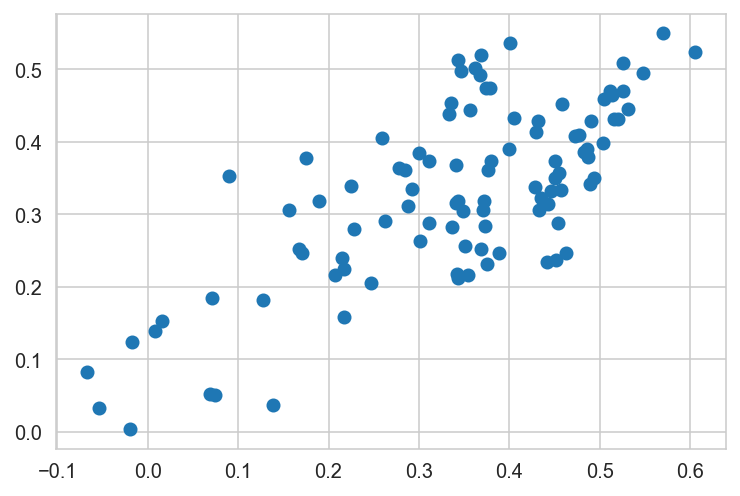

In [150]:
plt.scatter(bfasg,bfas_corr['opg'].iloc[0:-2])

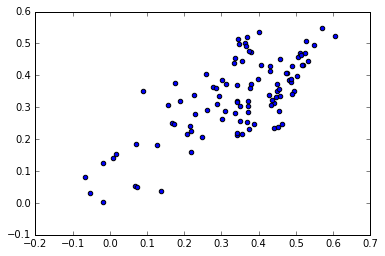

In [49]:
plt.scatter(bfasg,bfascorr[:-1])

#Now, As written
1. reverse all the stuff
2. rextract a GFP
3. eat cake
4. Profit

In [50]:
bfas_cols = correct_order_bfas

In [51]:
#### AS Factor Analyzed:


In [43]:
neuro_lbl = ['BFAS.5.',
 'BFAS.2.',
 'BFAS.1.',
 'BFAS.6.',
 'BFAS.4.',
 'BFAS.3.',
 'BFAS.15.',
 'BFAS.10.',
 'BFAS.13.',
 'BFAS.F7.',
 'BFAS.11.',
 'BFAS.14.',
 'BFAS.12.',
 'BFAS.17.',
 'BFAS.9.',
 'BFAS.16.',
 'BFAS.8.',
 'BFAS.19.',
 'BFAS.50.',
 'BFAS.20.',
 'BFAS.18.',
 'BFAS.47.',
 'BFAS.49.']


neurols = [5,2,1,6,4,3,15,10,13,7,11,14,12,17,9,16,8,19,50,20,18,47,49] 

In [45]:
print (len(neuro_lbl))
print (len(neurols))

23
23


In [46]:
agree_lbl =['BFAS.26.',
 'BFAS.23.',
 'BFAS.28.',
 'BFAS.27.',
 'BFAS.22.',
 'BFAS.21.',
 'BFAS.24.',
 'BFAS.25.',
 'BFAS.29.',
 'BFAS.30.',
 'BFAS.37.',
 'BFAS.40.',
 'BFAS.63.',
 'BFAS.91.',
 'BFAS.62.',
 'BFAS.35.',
 'BFAS.68.',
 'BFAS.67.',
 'BFAS.101.',
 'BFAS.90.',
 'BFAS.96.',
 'BFAS.98.',
 'BFAS.69.']



agree_ls = [26,23,28,27,22,21,24,25,29,30,37,40,63,91,62,35,68,67,100,90,95,97,69] 
#96,98 and 101 are mislabled; their index is adjusted by -1

In [48]:
print (len(agree_lbl))
print (len(agree_ls))

23
23


In [49]:
extra_lbl = ['BFAS.73.',
 'BFAS.75.',
 'BFAS.71.',
 'BFAS.74.',
 'BFAS.72.',
 'BFAS.77.',
 'BFAS.78.',
 'BFAS.76.',
 'BFAS.79.',
 'BFAS.61.',
 'BFAS.80.',
 'BFAS.64.',
 'BFAS.F85.',
 'BFAS.70.',
 'BFAS.65.',
 'BFAS.44.',
 'BFAS.38.',
 'BFAS.32.',
 'BFAS.34.',
 'BFAS.36.',
 'BFAS.33.',
 'BFAS.39.']



extra_ls = [73,75,71,74,72,77,78,76,79,61,80,64,85,70,65,44,38,32,34,36,33,39]

In [50]:
print (len(extra_lbl))
print (len(extra_ls))

22
22


In [51]:
conci_lbl = ['BFAS.51.',
 'BFAS.52.',
 'BFAS.56.',
 'BFAS.53.',
 'BFAS.54.',
 'BFAS.31.',
 'BFAS.55.',
 'BFAS.57.',
 'BFAS.42.',
 'BFAS.58.',
 'BFAS.41.',
 'BFAS.59.',
 'BFAS.60.',
 'BFAS.45.',
 'BFAS.46.',
 'BFAS.F86.',
 'BFAS.43.',
 'BFAS.48.',
 'BFAS.100.']


conci_ls = [51,52,56,53,54,31,55,57,42,58,41,59,60,45,46,86,43,48,99]

In [52]:
print (len(conci_lbl))
print (len(conci_ls))

19
19


In [53]:
opn_lbl = ['BFAS.F87.',
 'BFAS.F83.',
 'BFAS.88.',
 'BFAS.81.',
 'BFAS.82.',
 'BFAS.97.',
 'BFAS.89.',
 'BFAS.F84.',
 'BFAS.92.',
 'BFAS.90..1',
 'BFAS.99.',
 'BFAS.95.',
 'BFAS.66.']
opn_ls = [87,83,88,81,82,96,89,84,93,91,98,94,66]

In [54]:
print (len(opn_lbl))
print (len(opn_ls))

13
13


In [62]:
bfasfa = bfas.copy(True)


In [64]:
#columns to reverse so that they point towards their named factor
#Raw Items were already reversed
#All Neuroticism items were then reversed again
rv_cols = [38,32,34,36,33,39,99,66]


In [65]:
colz = bfasfa.columns.values.tolist()

In [66]:
reverse = [correct_order_bfas[x-1] for x in rv_cols]

In [67]:
for l in reverse:
    bfasfa[l] = 100 - bfasfa[l]

In [68]:
bfas.head()


,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-100-,BFAS-101-,opg
0,8.85,45.04,89.25,70.55,9.47,30.68,9.08,90.03,89.70,10.41,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,69.43,58.85,70.32,60.41,66.65,89.81,69.54,69.99,39.81,10.86,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,40.26,26.67,66.04,28.23,74.11,35.36,90.14,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,64.64,90.70,89.37,90.37,90.14,65.87,90.26,91.04,88.25,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,86.02,9.97,81.845684
1,34.97,36.53,39.31,9.80,59.80,49.55,0.00,67.59,49.55,39.76,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,89.31,89.98,100.00,79.40,90.20,99.55,100.00,100.00,100.00,100.00,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,100.00,2.67,11.02,8.57,24.83,24.61,6.46,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,0.00,89.76,90.09,100.00,10.13,100.00,89.64,59.35,49.33,74.28,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,65.14,0.00,78.777211
2,58.80,40.87,32.63,31.40,28.40,37.81,41.20,62.58,30.96,40.65,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,82.52,66.93,75.61,65.70,66.48,83.41,34.41,77.62,70.49,67.26,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,78.51,40.65,55.90,67.26,73.72,68.37,71.83,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,34.52,67.37,60.58,39.98,60.36,49.78,53.67,67.48,25.50,59.02,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,67.82,60.24,59.035684
3,50.00,50.00,50.00,50.00,36.36,50.00,37.25,50.00,50.00,50.00,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,81.57,67.09,71.05,77.34,77.34,50.00,93.26,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,74.11,63.08,50.00,70.55,72.10,65.53,67.43,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,76.22,50.00,30.46,50.00,75.56,50.00,50.11,59.86,79.57,63.31,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,87.03,62.42,69.273737
4,50.00,51.73,47.94,19.65,50.00,50.00,10.08,90.70,49.16,50.00,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,89.48,89.70,50.00,92.26,50.00,42.48,8.63,31.01,73.55,9.30,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,50.00,91.70,79.57,90.14,90.59,89.81,50.00,89.70,90.59,90.92,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,66.43,22.22,65.762947


In [69]:
bfasfa.head()

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-100-,BFAS-101-,opg
0,8.85,45.04,89.25,70.55,9.47,30.68,9.08,90.03,89.70,10.41,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,69.43,58.85,29.68,39.59,33.35,89.81,30.46,69.99,60.19,89.14,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,40.26,26.67,66.04,28.23,74.11,35.36,9.86,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,64.64,90.70,89.37,90.37,90.14,65.87,90.26,91.04,88.25,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,13.98,9.97,81.845684
1,34.97,36.53,39.31,9.80,59.80,49.55,0.00,67.59,49.55,39.76,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,89.31,89.98,0.00,20.60,9.80,99.55,0.00,100.00,0.00,0.00,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,100.00,2.67,11.02,8.57,24.83,24.61,93.54,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,0.00,89.76,90.09,100.00,10.13,100.00,89.64,59.35,49.33,74.28,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,34.86,0.00,78.777211
2,58.80,40.87,32.63,31.40,28.40,37.81,41.20,62.58,30.96,40.65,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,82.52,66.93,24.39,34.30,33.52,83.41,65.59,77.62,29.51,32.74,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,78.51,40.65,55.90,67.26,73.72,68.37,28.17,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,34.52,67.37,60.58,39.98,60.36,49.78,53.67,67.48,25.50,59.02,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,32.18,60.24,59.035684
3,50.00,50.00,50.00,50.00,36.36,50.00,37.25,50.00,50.00,50.00,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,18.43,32.91,28.95,77.34,22.66,50.00,6.74,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,74.11,63.08,50.00,70.55,72.10,65.53,32.57,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,76.22,50.00,30.46,50.00,75.56,50.00,50.11,59.86,79.57,63.31,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,12.97,62.42,69.273737
4,50.00,51.73,47.94,19.65,50.00,50.00,10.08,90.70,49.16,50.00,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,89.48,89.70,50.00,7.74,50.00,42.48,91.37,31.01,26.45,90.70,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,50.00,91.70,79.57,90.14,90.59,89.81,50.00,89.70,90.59,90.92,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,33.57,22.22,65.762947


In [91]:
bfasfa = bfasfa.drop(['opg'],axis=1)

In [92]:
bfasfa.to_csv("BFAS_STUDY_I_as_FA.csv",index=False)

In [4]:
bfasfa = pd.read_csv("BFAS_STUDY_I_as_FA.csv")

In [5]:
bfasfa

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-100-,BFAS-101-
0,8.85,45.04,89.25,70.55,9.47,30.68,9.08,90.03,89.70,10.41,32.46,63.64,8.63,90.81,35.75,11.08,23.55,11.08,10.75,88.59,90.37,90.59,74.22,60.41,30.35,69.65,68.54,70.43,70.77,69.43,58.85,29.68,39.59,33.35,89.81,30.46,69.99,60.19,89.14,20.43,89.70,89.81,89.14,60.63,39.70,74.00,30.68,79.90,89.25,37.69,34.91,61.08,74.11,50.00,60.13,88.70,39.59,73.00,10.63,40.26,26.67,66.04,28.23,74.11,35.36,9.86,39.81,40.03,69.65,69.43,89.09,70.55,30.12,40.37,65.42,89.14,90.92,70.43,75.33,64.64,90.70,89.37,90.37,90.14,65.87,90.26,91.04,88.25,89.70,89.25,90.37,60.30,89.14,75.11,28.34,89.59,35.24,91.04,13.98,9.97
1,34.97,36.53,39.31,9.80,59.80,49.55,0.00,67.59,49.55,39.76,11.02,90.53,9.69,31.07,74.83,24.83,8.24,74.28,14.59,0.00,35.41,50.33,40.65,59.69,60.13,59.47,79.40,79.51,49.78,89.31,89.98,0.00,20.60,9.80,99.55,0.00,100.00,0.00,0.00,39.64,63.70,100.00,95.43,93.76,80.51,90.09,90.42,89.64,74.72,90.09,100.00,65.70,90.09,90.20,100.00,100.00,100.00,99.78,89.87,100.00,2.67,11.02,8.57,24.83,24.61,93.54,0.00,0.00,10.24,0.00,63.03,69.82,10.02,61.25,50.67,50.11,50.67,10.13,89.92,0.00,89.76,90.09,100.00,10.13,100.00,89.64,59.35,49.33,74.28,90.65,89.76,30.40,100.00,29.40,50.00,9.80,0.00,85.19,34.86,0.00
2,58.80,40.87,32.63,31.40,28.40,37.81,41.20,62.58,30.96,40.65,24.94,61.25,33.07,34.41,61.02,42.59,35.75,40.09,37.64,29.84,64.42,59.13,64.25,42.98,60.47,54.45,50.00,45.43,59.58,82.52,66.93,24.39,34.30,33.52,83.41,65.59,77.62,29.51,32.74,35.86,68.37,63.25,37.97,39.98,31.96,25.61,53.12,64.03,40.42,19.04,81.85,68.04,69.27,75.06,65.53,64.42,66.37,74.16,65.26,78.51,40.65,55.90,67.26,73.72,68.37,28.17,59.35,36.64,62.36,59.91,43.99,55.23,39.53,42.43,65.48,50.45,38.81,57.13,22.16,34.52,67.37,60.58,39.98,60.36,49.78,53.67,67.48,25.50,59.02,73.83,33.63,58.57,55.12,88.75,60.24,71.49,32.41,71.83,32.18,60.24
3,50.00,50.00,50.00,50.00,36.36,50.00,37.25,50.00,50.00,50.00,27.67,50.00,32.46,35.24,50.00,50.00,50.00,84.52,50.00,50.00,50.00,50.00,49.89,50.00,50.00,31.90,50.00,50.00,70.32,50.00,50.00,18.43,32.91,28.95,77.34,22.66,50.00,6.74,50.00,30.79,56.96,50.00,50.00,22.44,24.33,28.12,32.80,49.94,35.91,21.44,62.19,50.00,50.00,70.77,50.00,67.76,33.46,73.33,73.44,74.11,63.08,50.00,70.55,72.10,65.53,32.57,50.00,50.00,71.88,64.03,50.00,80.90,68.99,50.00,61.08,61.53,78.34,71.33,61.30,76.22,50.00,30.46,50.00,75.56,50.00,50.11,59.86,79.57,63.31,64.53,50.00,60.63,50.17,49.89,61.30,80.57,68.65,69.54,12.97,62.42
4,50.00,51.73,47.94,19.65,50.00,50.00,10.08,90.70,49.16,50.00,50.00,74.11,35.02,90.03,88.81,43.15,43.26,50.00,50.00,50.00,71.21,62.19,62.31,74.00,90.48,16.65,29.45,91.04,50.00,89.48,89.70,50.00,7.74,50.00,42.48,91.37,31.01,26.45,90.70,33.91,91.04,50.00,85.36,91.15,50.00,89.70,90.37,92.26,25.89,50.00,92.37,50.00,91.04,71.77,53.40,60.19,73.33,63.20,66.65,70.10,72.33,10.75,89.25,89.92,50.00,50.00,50.00,9.86,28.90,93.15,90.48,69.32,91.04,98.05,89.37,90.92,71.33,90.59,68.88,50.00,91.70,79.57,90.14,90.59,89.81,50.00,89.70,90.59,90.92,98.39,88.47,53.84,56.29,70.77,55.73,50.00,91.59,77.90,33.57,22.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [102]:
bfasfa_omega = pd.read_csv("./BFAS_I_OMEGA_5_AS_FACTOR_ANALYZED.csv")

In [103]:
bfasfa_omega.head()

,Unnamed: 0,g,F1*,F2*,F3*,F4*,F5*,h2,u2,p2
0,BFAS.1.,0.476637,0.632021,0.124133,-0.132954,0.059930,-0.048443,0.659270,0.340730,0.344598
1,BFAS.2.,0.525610,0.679498,-0.010949,-0.027628,0.086537,-0.028094,0.739651,0.260349,0.373508
2,BFAS.3.,0.482756,0.564249,0.008627,-0.039765,0.036342,0.089735,0.557165,0.442835,0.418284
3,BFAS.4.,0.503473,0.587598,0.020781,0.000046,-0.047790,0.082465,0.609514,0.390486,0.415880
4,BFAS.5.,0.490529,0.693857,0.085786,-0.122198,0.028801,-0.078177,0.746543,0.253457,0.322311


In [104]:
fa_g = bfasfa_omega['g'].values

In [105]:
fa_g 

array([ 0.47663746,  0.52560996,  0.48275561,  0.50347256,  0.4905294 ,
        0.37137473,  0.35104956,  0.44624294,  0.43129929,  0.37923487,
        0.49373488,  0.51129174,  0.34287553,  0.60593284,  0.48698864,
        0.45862062,  0.4572851 ,  0.47227512,  0.4425479 ,  0.37499413,
        0.33338787,  0.40120902,  0.33511436,  0.35624316,  0.37883385,
        0.34329519,  0.3460554 ,  0.36210088,  0.3692177 ,  0.17480598,
        0.21541383, -0.01538034, -0.00768704, -0.07059622,  0.3109161 ,
       -0.09039382,  0.259221  , -0.22536189,  0.01742931,  0.15605346,
        0.56976645,  0.54801765,  0.51992724,  0.35394937,  0.53137805,
        0.52619499,  0.4860886 ,  0.37431156,  0.50478719,  0.51607642,
        0.2465519 ,  0.37156044,  0.2878574 ,  0.13810546,  0.21700956,
        0.20720802,  0.39930107,  0.06864241,  0.07389738, -0.01908086,
        0.4500573 ,  0.37646422,  0.34143476,  0.4291749 ,  0.34282004,
       -0.31085247,  0.33657276,  0.22808626,  0.12726505,  0.43

In [106]:
bfasfa['opg'] = ssopg['opg']

In [107]:
bc = bfasfa.corr()

In [109]:
bc

,BFAS-1+,BFAS-2+,BFAS-3+,BFAS-4+,BFAS-5+,BFAS-6+,BFAS-F7-,BFAS-8-,BFAS-9-,BFAS-10-,BFAS-11+,BFAS-12+,BFAS-13+,BFAS-14+,BFAS-15+,BFAS-16+,BFAS-17-,BFAS-18-,BFAS-19-,BFAS-20-,BFAS-21+,BFAS-22+,BFAS-23+,BFAS-24+,BFAS-25+,BFAS-26-,BFAS-27-,BFAS-28-,BFAS-29-,BFAS-30-,BFAS-31+,BFAS-32+,BFAS-33+,BFAS-34+,BFAS-35-,BFAS-36-,BFAS-37-,BFAS-38-,BFAS-39-,BFAS-40-,BFAS-41+,BFAS-42+,BFAS-43+,BFAS-44+,BFAS-45-,BFAS-46-,BFAS-47-,BFAS-48-,BFAS-49-,BFAS-50-,BFAS-51+,BFAS-52+,BFAS-53+,BFAS-54+,BFAS-55+,BFAS-56+,BFAS-57-,BFAS-58-,BFAS-59-,BFAS-60-,BFAS-61+,BFAS-62+,BFAS-63+,BFAS-64+,BFAS-65+,BFAS-66-,BFAS-67-,BFAS-68-,BFAS-69-,BFAS-70-,BFAS-71+,BFAS-72+,BFAS-73+,BFAS-74+,BFAS-75+,BFAS-76+,BFAS-77-,BFAS-78-,BFAS-79-,BFAS-80-,BFAS-81+,BFAS-82+,BFAS-F83+,BFAS-F84+,BFAS-F85+,BFAS-F86+,BFAS-F87-,BFAS-88-,BFAS-89-,BFAS-90+,BFAS-90-,BFAS-91+,BFAS-92+,BFAS-95+,BFAS-96+,BFAS-97+,BFAS-98-,BFAS-99-,BFAS-100-,BFAS-101-,opg
BFAS-1+,1.000000,0.745641,0.537749,0.597311,0.763457,0.644188,0.589402,0.511534,0.525825,0.599838,0.456795,0.519328,0.405863,0.532162,0.514773,0.416019,0.405736,0.341069,0.369776,0.297723,0.148295,0.210516,0.214611,0.190094,0.255382,0.289355,0.309417,0.302449,0.330100,0.161315,0.126123,-0.101478,-0.140304,-0.214566,0.399308,-0.148636,0.284314,-0.360904,-0.179622,0.146224,0.339197,0.342256,0.293148,0.182293,0.362524,0.358441,0.374971,0.274794,0.335094,0.421164,0.077396,0.215724,0.116641,-0.069703,0.085423,0.045885,0.269805,-0.054161,-0.050649,-0.038678,0.323519,0.360458,0.231754,0.303189,0.233471,-0.240764,0.320114,0.172526,-0.003755,0.265671,0.159342,0.048253,0.229660,0.240142,0.135525,0.240116,0.047603,0.258356,0.209702,0.177832,0.213446,0.380363,0.290831,0.166274,0.200027,0.278846,0.257916,0.225644,0.354456,0.176851,0.207761,0.146155,0.123209,-0.034780,0.189173,0.027303,0.147753,-0.049861,0.039320,0.227525,0.065145
BFAS-2+,0.745641,1.000000,0.659937,0.673661,0.751937,0.635678,0.532288,0.618668,0.552117,0.565136,0.506486,0.638382,0.492250,0.638486,0.636594,0.523538,0.527822,0.403881,0.492190,0.439901,0.100557,0.190636,0.118161,0.140093,0.230880,0.194862,0.242673,0.209260,0.254754,0.110462,0.121291,-0.011285,-0.017077,-0.130877,0.283143,-0.069994,0.199609,-0.227359,-0.016152,0.130866,0.411277,0.424193,0.402920,0.226475,0.419872,0.423841,0.423348,0.284560,0.400707,0.476684,0.009805,0.205814,0.140950,-0.023502,0.092657,-0.010751,0.328393,-0.079701,-0.121567,-0.034678,0.357482,0.326024,0.188394,0.321933,0.213933,-0.262035,0.290591,0.130521,-0.004270,0.260539,0.233150,0.153476,0.258217,0.282329,0.211248,0.323006,0.199386,0.282833,0.337323,0.229311,0.281111,0.416394,0.333287,0.208946,0.310652,0.367712,0.298410,0.234574,0.378143,0.188931,0.237650,0.066307,0.103120,0.027774,0.123586,0.045778,0.093246,-0.058658,0.086036,0.171763,0.025598
BFAS-3+,0.537749,0.659937,1.000000,0.807737,0.606680,0.473805,0.409231,0.513471,0.485857,0.384026,0.469237,0.479356,0.413138,0.566156,0.588450,0.474877,0.567518,0.384489,0.502657,0.365743,0.166747,0.220506,0.132504,0.154399,0.173837,0.194557,0.259802,0.256854,0.232636,0.075383,0.181541,0.013240,-0.043711,-0.118179,0.246642,-0.106742,0.145343,-0.263670,-0.040095,0.104302,0.450146,0.453667,0.360037,0.230092,0.333309,0.431205,0.379588,0.373679,0.393282,0.472877,0.130369,0.211750,0.151067,0.012751,0.180629,0.073111,0.306136,0.015115,0.013074,0.054736,0.287036,0.231051,0.078942,0.217946,0.155354,-0.294075,0.338927,0.215491,-0.021998,0.254644,0.191921,0.140047,0.183161,0.217942,0.148857,0.292856,0.198994,0.240891,0.278982,0.299589,0.335812,0.295514,0.208696,0.218624,0.290136,0.341361,0.291418,0.202767,0.317298,0.150010,0.314939,0.038722,0.134969,0.007078,0.063796,-0.001338,0.080752,-0.045922,0.010493,0.181247,0.077018
BFAS-4+,0.597311,0.673661,0.807737,1.000000,0.628499,0.535010,0.441891,0.529519,0.510890,0.439439,0.497839,0.505861,0.420803,0.603348,0.566188,0.468924,0.595984,0.430121,0.556947,0.368869,0.122196,0.238833,0.146742,0.169872,0.176214,0.215737,0.279780,0.232122,0.299038,0.049682,0.178772,-0.019964,-0.034910,-

In [110]:
bc['opg'].values[0:-1]

array([ 0.06514498,  0.02559841,  0.07701765,  0.06737348,  0.02184449,
        0.01229355,  0.06235181,  0.03231822,  0.05823511, -0.0179314 ,
        0.02032785,  0.06085598, -0.01122663,  0.01897906, -0.00848469,
        0.02180561, -0.02191472, -0.0099349 , -0.04113458, -0.0577006 ,
        0.16398542,  0.11029108,  0.11954707,  0.12610581,  0.0959756 ,
        0.18706113,  0.13127041,  0.12603986,  0.15031421,  0.11096952,
       -0.00286072, -0.00487661, -0.00864486, -0.10076504,  0.06953328,
       -0.01189761,  0.09659475,  0.00381893, -0.02783777,  0.02768948,
        0.07115811,  0.05469134,  0.14010163,  0.02175116,  0.06566187,
        0.0525452 ,  0.11343918, -0.03253003,  0.06286162,  0.0056452 ,
        0.09066025,  0.04386541,  0.08994393,  0.01532214,  0.03451436,
        0.05657436,  0.08951336,  0.10804349,  0.10423243,  0.07908981,
        0.0302301 ,  0.08090267,  0.04714401,  0.05630273, -0.02314853,
        0.03487661,  0.06292429,  0.00721322, -0.01070172,  0.04

In [111]:
fa_g

array([ 0.47663746,  0.52560996,  0.48275561,  0.50347256,  0.4905294 ,
        0.37137473,  0.35104956,  0.44624294,  0.43129929,  0.37923487,
        0.49373488,  0.51129174,  0.34287553,  0.60593284,  0.48698864,
        0.45862062,  0.4572851 ,  0.47227512,  0.4425479 ,  0.37499413,
        0.33338787,  0.40120902,  0.33511436,  0.35624316,  0.37883385,
        0.34329519,  0.3460554 ,  0.36210088,  0.3692177 ,  0.17480598,
        0.21541383, -0.01538034, -0.00768704, -0.07059622,  0.3109161 ,
       -0.09039382,  0.259221  , -0.22536189,  0.01742931,  0.15605346,
        0.56976645,  0.54801765,  0.51992724,  0.35394937,  0.53137805,
        0.52619499,  0.4860886 ,  0.37431156,  0.50478719,  0.51607642,
        0.2465519 ,  0.37156044,  0.2878574 ,  0.13810546,  0.21700956,
        0.20720802,  0.39930107,  0.06864241,  0.07389738, -0.01908086,
        0.4500573 ,  0.37646422,  0.34143476,  0.4291749 ,  0.34282004,
       -0.31085247,  0.33657276,  0.22808626,  0.12726505,  0.43

In [113]:
bfasfa_omega

,Unnamed: 0,g,F1*,F2*,F3*,F4*,F5*,h2,u2,p2
0,BFAS.1.,0.476637,0.632021,0.124133,-0.132954,0.059930,-0.048443,0.659270,0.340730,0.344598
1,BFAS.2.,0.525610,0.679498,-0.010949,-0.027628,0.086537,-0.028094,0.739651,0.260349,0.373508
2,BFAS.3.,0.482756,0.564249,0.008627,-0.039765,0.036342,0.089735,0.557165,0.442835,0.418284
3,BFAS.4.,0.503473,0.587598,0.020781,0.000046,-0.047790,0.082465,0.609514,0.390486,0.415880
4,BFAS.5.,0.490529,0.693857,0.085786,-0.122198,0.028801,-0.078177,0.746543,0.253457,0.322311
...,...,...,...,...,...,...,...,...,...,...
95,BFAS.97.,0.171196,-0.117548,0.276555,0.135755,0.410005,-0.094138,0.316824,0.683176,0.092506
96,BFAS.98.,0.216890,0.001854,0.321842,0.034509,0.295144,-0.063309,0.242877,0.757123,0.193683
97,BFAS.99.,-0.067494,-0.144975,0.216472,-0.035653,0.300764,-0.226474,0.212448,0.787552,0.021442
98,BFAS.100.,0.054310,0.094481,-0.225820,0.044381,-0.247691,0.251780,0.184587,0.815413,0.015980


In [108]:
ssp.pearsonr(bc['opg'].values[0:-1],fa_g)

(0.09433004763622345, 0.35054919110074045)

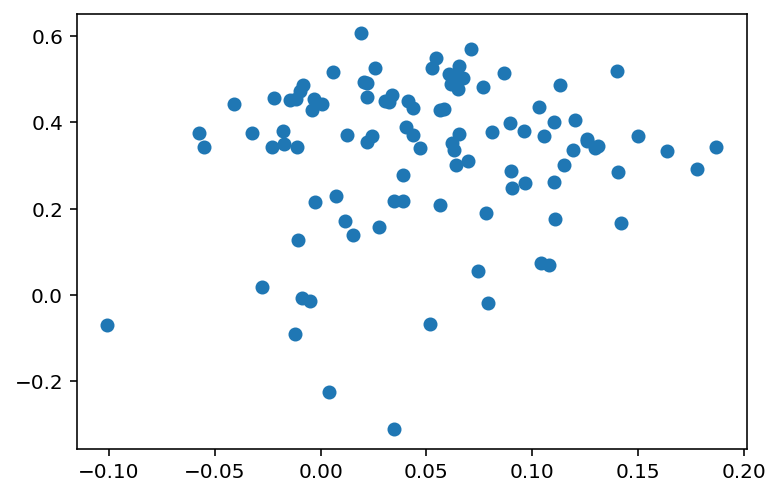

In [114]:
plt.scatter(bc['opg'].values[0:-1],fa_g)

In [62]:
outputbfas = bfas.drop('gfp',axis=1)

In [65]:
outputbfas = bfas.drop('workerid',axis=1)

In [71]:
outputbfas.drop('gfp',axis=1,inplace=True)

In [72]:
outputbfas.columns

Index(['BFAS-1+', 'BFAS-10-', 'BFAS-100-', 'BFAS-101-', 'BFAS-11+', 'BFAS-12+',
       'BFAS-13+', 'BFAS-14+', 'BFAS-15+', 'BFAS-16+', 'BFAS-17-', 'BFAS-18-',
       'BFAS-19-', 'BFAS-2+', 'BFAS-20-', 'BFAS-21+', 'BFAS-22+', 'BFAS-23+',
       'BFAS-24+', 'BFAS-25+', 'BFAS-26-', 'BFAS-27-', 'BFAS-28-', 'BFAS-29-',
       'BFAS-3+', 'BFAS-30-', 'BFAS-31+', 'BFAS-32+', 'BFAS-33+', 'BFAS-34+',
       'BFAS-35-', 'BFAS-36-', 'BFAS-37-', 'BFAS-38-', 'BFAS-39-', 'BFAS-4+',
       'BFAS-40-', 'BFAS-41+', 'BFAS-42+', 'BFAS-43+', 'BFAS-44+', 'BFAS-45-',
       'BFAS-46-', 'BFAS-47-', 'BFAS-48-', 'BFAS-49-', 'BFAS-5+', 'BFAS-50-',
       'BFAS-51+', 'BFAS-52+', 'BFAS-53+', 'BFAS-54+', 'BFAS-55+', 'BFAS-56+',
       'BFAS-57-', 'BFAS-58-', 'BFAS-59-', 'BFAS-6+', 'BFAS-60-', 'BFAS-61+',
       'BFAS-62+', 'BFAS-63+', 'BFAS-64+', 'BFAS-65+', 'BFAS-66-', 'BFAS-67-',
       'BFAS-68-', 'BFAS-69-', 'BFAS-70-', 'BFAS-71+', 'BFAS-72+', 'BFAS-73+',
       'BFAS-74+', 'BFAS-75+', 'BFAS-76+', 'BFAS-77-', '

In [73]:
outputbfas.to_csv("2021BFAS_STUDYI_OUTPUT.csv")

In [67]:
!pwd

/Users/Evan/Dropbox/Delphy Research Dropbox/Delphy Tech/research/Openness-to-Personal-Growth/Code for Data Analysis _ Scripts/Study I/BFAS/General_Factor_Extraction_and_Correlations


In [74]:
len(outputbfas)

333